<a href="https://colab.research.google.com/github/sobjiolagnol/NLP-extraction-d-informations-sur-les-PDF-et-Images/blob/main/TP_Times_series_Lagnol_SOBJIO_%26_Mohamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](http://www.mundocuentas.com/img-servicios/yahoo.png)

# **Introduction**

La prédiction des prix des actions constitue un domaine à la fois captivant et stratégique dans l'analyse financière. Elle repose sur une combinaison puissante de méthodes statistiques, de modèles mathématiques et d'approches d'apprentissage automatique, visant à anticiper les mouvements du marché boursier. Avec des milliards de transactions réalisées quotidiennement à l'échelle mondiale, les marchés financiers produisent une quantité massive de données historiques, notamment les prix d'ouverture, de clôture, les variations intrajournalières, et les volumes échangés. Ces informations représentent une mine d'or pour le développement de modèles prédictifs capables de déceler des schémas et d'estimer les fluctuations futures des prix des actions.

Dans le cadre de ce projet, nous avons pour ambition de concevoir un modèle robuste de prédiction des prix des actions en exploitant ces données historiques, accessibles via des plateformes telles que Yahoo Finance ou Alpha Vantage. Pour ce faire, nous utilisons des techniques avancées d'analyse des séries temporelles et d'apprentissage automatique. Ces méthodes incluent des modèles statistiques éprouvés comme ARIMA, SARIMAX et GARCH, ainsi que des approches modernes basées sur des réseaux de neurones récurrents tels que LSTM (*Long Short-Term Memory*). Ces outils permettront d'identifier des tendances, de capturer des motifs saisonniers et de détecter des anomalies dans les données financières.

Pour atteindre cet objectif, une méthodologie rigoureuse a été adoptée :

1. **Préparation des données** : Nettoyage et prétraitement des données pour garantir leur qualité et leur pertinence.
2. **Analyse exploratoire des données (EDA)** : Exploration des dynamiques du marché et identification des facteurs clés influençant les variations des prix.
3. **Ingénierie des caractéristiques** : Création de variables supplémentaires, telles que des indicateurs techniques, pour enrichir la base de données d'entrée.
4. **Sélection et entraînement des modèles** : Comparaison et ajustement de divers algorithmes pour optimiser les performances prédictives.
5. **Évaluation des performances** : Mesure de l'efficacité des modèles à l'aide de métriques telles que AIC, BIC et RMSE.
6. **Visualisation et interprétation** : Présentation des résultats sous forme de graphiques comparant les prédictions aux valeurs réelles.

Ce projet ne se limite pas à un exercice académique. Il ambitionne de répondre à des enjeux concrets en gestion de portefeuilles et en prise de décision d'investissement. Toutefois, il est essentiel de souligner que la prédiction des prix des actions reste un défi complexe, influencé par une multitude de facteurs externes, notamment les annonces économiques, les déclarations d'entreprises et les fluctuations des sentiments du marché. Une extension naturelle de ce projet pourrait consister à intégrer des variables exogènes supplémentaires, telles que les nouvelles financières ou les indicateurs macroéconomiques, afin d'améliorer encore la précision des prédictions.

En résumé, ce projet représente une opportunité unique d'approfondir l'analyse des séries temporelles tout en illustrant le potentiel des outils modernes pour relever un défi fondamental du domaine financier.


In [1]:
# pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('bmh')

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

# **I) PRETRAITEMENT DES DONNEES ET ANALYSE EXPLORATOIRE**

In [4]:
ticker = "MSFT"
start_date = "2020-01-01"
end_date = "2023-12-31"
data = yf.download(ticker, start=start_date, end=end_date,actions=True)

[*********************100%***********************]  1 of 1 completed


Le code suivant télécharge les données historiques pour une action spécifique  sur une période donnée à l'aide de la bibliothèque `yfinance`.

- **ticker** : Représente le symbole boursier de l'entreprise ou de l'indice que nous analysons. Ici, `AAPL` correspond à Apple Inc.
- **start_date** et **end_date** : Définissent la période pour laquelle nous récupérons les données historiques.  
  - `start_date = "2020-01-01"` : Date de début des données.  
  - `end_date = "2023-12-31"` : Date de fin des données.
- **`yf.download`** : Fonction utilisée pour télécharger les données financières via `yfinance`.  
  - Le paramètre `actions=True` permet d'inclure les ajustements liés aux dividendes et aux splits d'actions dans les données.

#### Données retournées :
---

Le résultat sera un DataFrame contenant les colonnes suivantes :
- **Open** : Prix d'ouverture de chaque journée (en dollars américains, USD).  
- **High** : Prix le plus haut atteint dans la journée (en USD).  
- **Low** : Prix le plus bas atteint dans la journée (en USD).  
- **Close** : Prix de clôture (en USD).  
- **Dividendes** : Montant des dividendes versés aux actionnaires, s'il y en a eu pendant la journée (en USD par action).  
- **Stock Splits** : Nombre d'actions créées suite à un fractionnement de l'action (split), indiquant l'impact de ces splits sur le nombre d'actions en circulation et le prix par action.  
- **Volume** : Nombre d'actions échangées au cours de la journée (en unités).  

---

In [5]:
data.columns=data.columns.droplevel(1)
data.reset_index(inplace=True)
data.rename(columns={'index': 'Date'}, inplace=True)

## Explication des ajustements pour `Adj Close`

Le **Adj Close** est calculé en ajustant le **Close** pour tenir compte des dividendes et des splits d'actions.

### 1. **Dividendes**
Les dividendes sont soustraits du **Close** pour ajuster le prix :

$\text{Adj Close} = \text{Close} - \text{Dividendes}$

### 2. **Splits d'Actions**
Lors d'un split d'actions, le **Close** est ajusté en fonction du ratio du split :

$\text{Adj Close} = \frac{\text{Close}}{1 + \text{Stock Splits}}$

In [6]:
data['Adj Close'] = data['Close'] - data['Dividends']
data['Adj Close'] /= (1 + data['Stock Splits'])
data=data[["Date","Open", "High", "Low", "Close",  "Volume","Adj Close"]]

In [7]:
data.describe()

Price,Date,Open,High,Low,Close,Volume,Adj Close
count,1006,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000
mean,2021-12-30 11:57:08.230616320,256.531355,259.302740,253.735339,256.641232,3.065417e+07,256.631570
min,2020-01-02 00:00:00,131.405991,134.820392,127.099651,129.881088,9.200800e+06,129.881088
25%,2020-12-30 06:00:00,214.764017,216.358705,211.307754,214.892311,2.249522e+07,214.892311
50%,2021-12-29 12:00:00,252.857420,255.872148,249.743854,253.355347,2.727275e+07,253.355347
75%,2022-12-28 18:00:00,296.375970,300.525878,293.273506,296.604317,3.462020e+07,296.604317
max,2023-12-29 00:00:00,380.911584,381.447555,375.353186,379.859497,9.701270e+07,379.859497
std,NaN,55.367207,55.477163,55.111391,55.341065,1.299798e+07,55.339486


In [8]:
data.shape

(1006, 7)

In [9]:
data.isnull().sum()

,0
Price,
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


Distribution des prix ajustés

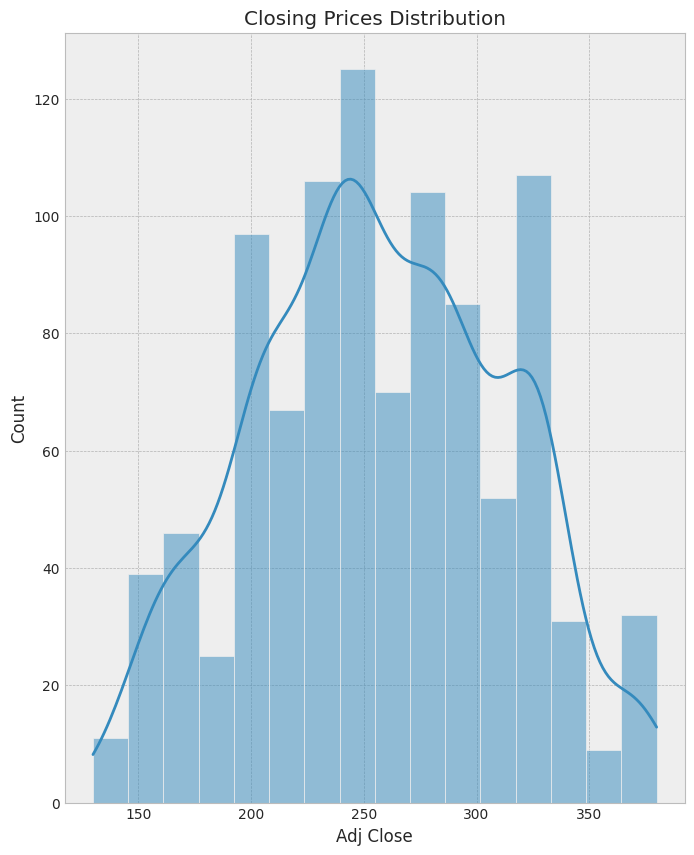

In [10]:
fig, axs = plt.subplots(1, figsize=(8,10))
sns.histplot(data=data, x='Adj Close', ax=axs, kde=True)
axs.set_title('Closing Prices Distribution')
plt.show()

### **1) Visualisation des tendances des prix et leur densités de l'action**

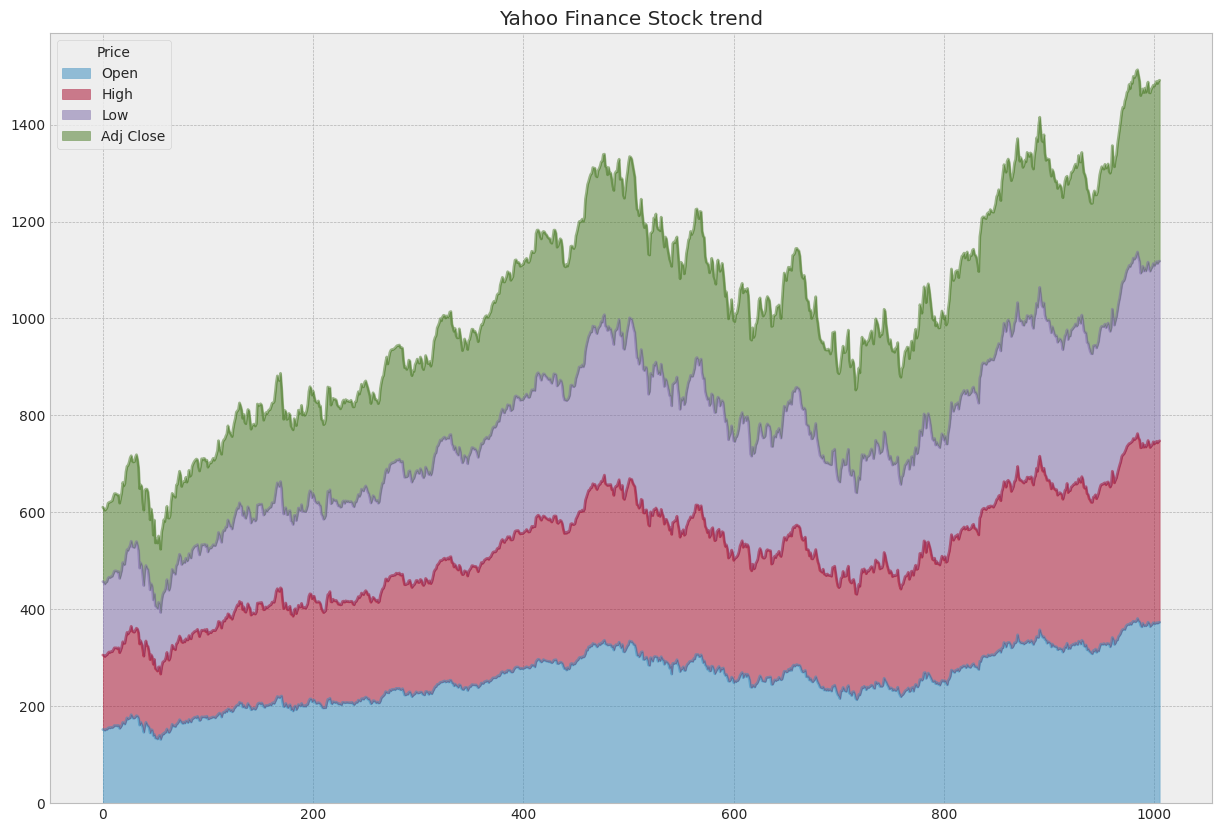

In [11]:
data[["Open","High","Low","Adj Close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('Yahoo Finance Stock trend')
plt.show()

# Nouvelle section

<Axes: ylabel='Density'>

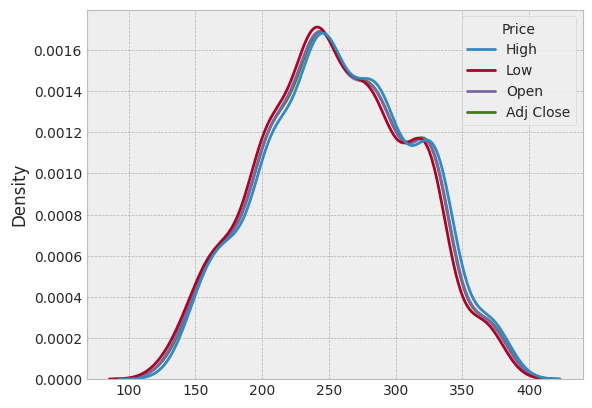

In [12]:
sns.kdeplot(data = data[['High', 'Low', 'Open', "Adj Close"]])

Les courbes de densité pour les prix `High`, `Low`, `Open` et `Adj Close` de l'action Microsoft superposées indiquent une faible volatilité et une stabilité des prix pendant la période étudiée. Les prix sont proches les uns des autres, suggérant un marché calme sans événements majeurs affectant l'action.

### **2) Quelle a été l'évolution du prix de l'action au fil du temps ?**

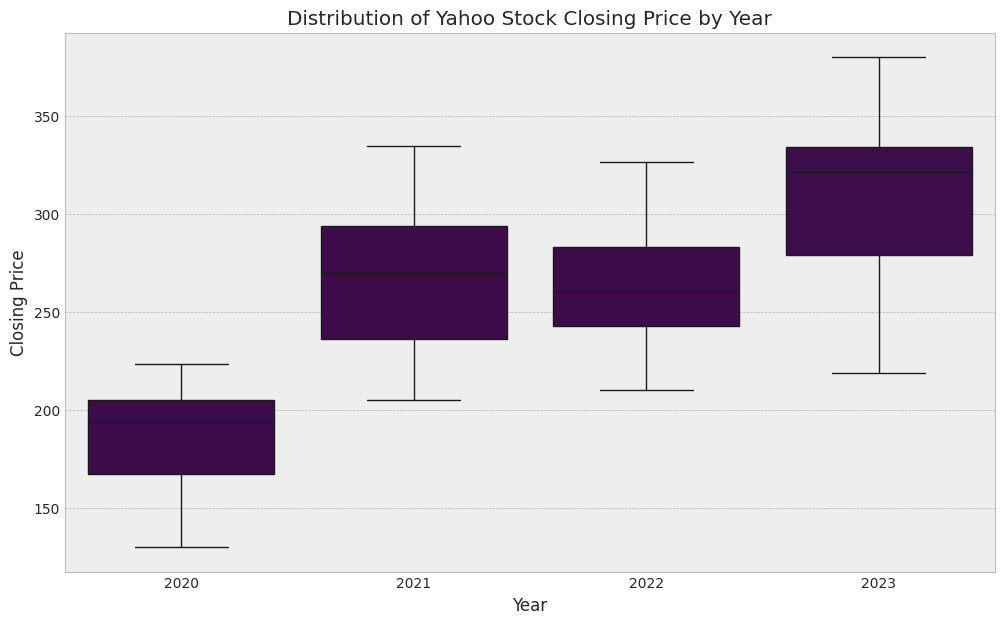

In [13]:
# Création du boxplot avec extraction directe des années
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=data,
    x=pd.to_datetime(data['Date']).dt.year,  # Extraction des années directement
    y='Adj Close',
    palette=sns.color_palette("viridis", data['Date'].nunique())  # Couleurs basées sur les années uniques
)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Distribution of Yahoo Stock Closing Price by Year')

plt.show()


Le boxplot montre que, au fil des années, les prix de clôture ajustés de l'action Yahoo ont tendance à augmenter. Plus les années passent, plus la médiane des prix de clôture se situe à un niveau plus élevé, indiquant une tendance générale à la hausse des prix de l'action. La dispersion des prix semble aussi augmenter, suggérant une volatilité croissante avec le temps.

In [14]:
data.describe()

Price,Date,Open,High,Low,Close,Volume,Adj Close
count,1006,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000
mean,2021-12-30 11:57:08.230616320,256.531355,259.302740,253.735339,256.641232,3.065417e+07,256.631570
min,2020-01-02 00:00:00,131.405991,134.820392,127.099651,129.881088,9.200800e+06,129.881088
25%,2020-12-30 06:00:00,214.764017,216.358705,211.307754,214.892311,2.249522e+07,214.892311
50%,2021-12-29 12:00:00,252.857420,255.872148,249.743854,253.355347,2.727275e+07,253.355347
75%,2022-12-28 18:00:00,296.375970,300.525878,293.273506,296.604317,3.462020e+07,296.604317
max,2023-12-29 00:00:00,380.911584,381.447555,375.353186,379.859497,9.701270e+07,379.859497
std,NaN,55.367207,55.477163,55.111391,55.341065,1.299798e+07,55.339486


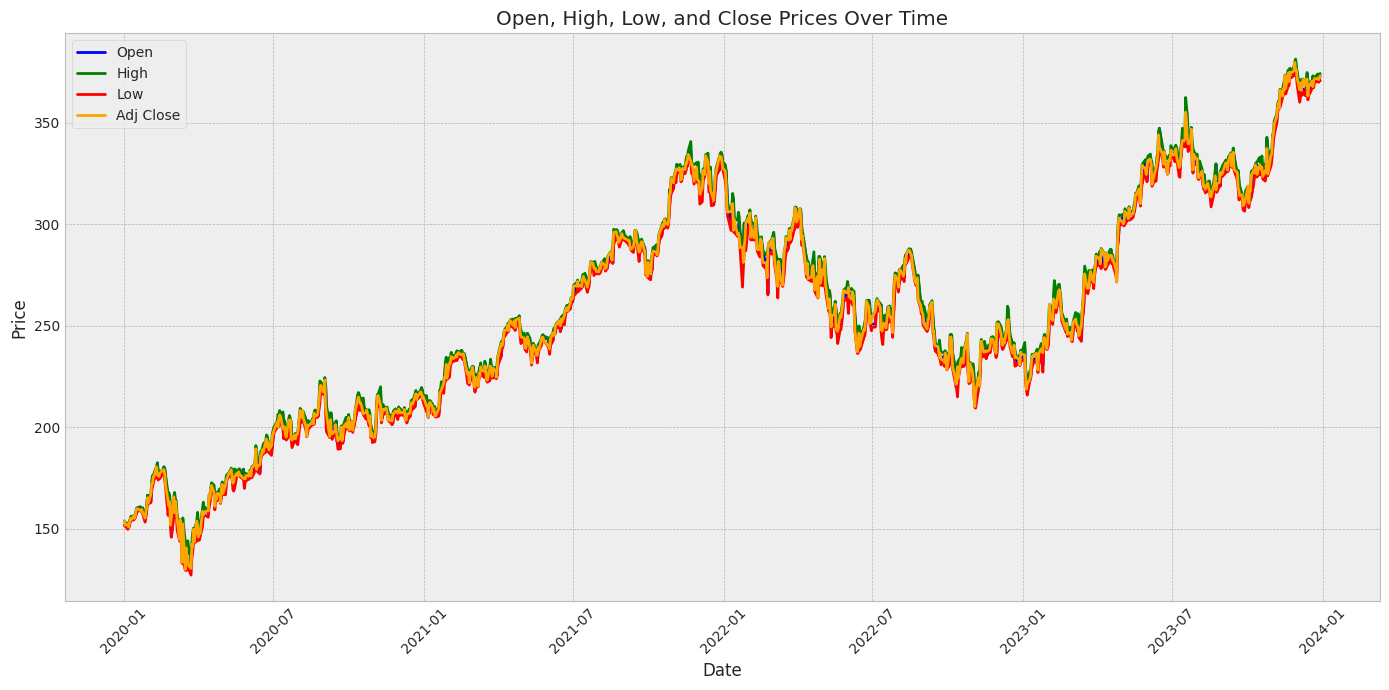

In [15]:

plt.figure(figsize=(14, 7))

# Tracer 'Open', 'High', 'Low', et 'Close'
plt.plot(data['Date'], data['Open'], label='Open', color='blue')
plt.plot(data['Date'], data['High'], label='High', color='green')
plt.plot(data['Date'], data['Low'], label='Low', color='red')
plt.plot(data['Date'], data['Adj Close'], label='Adj Close', color='orange')

# Ajouter des labels et un titre
plt.title('Open, High, Low, and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Afficher la grille et le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour plus de lisibilité
plt.tight_layout()  # Ajuster les éléments du graphique pour éviter qu'ils ne se chevauchent
plt.show()

### **3) Quelle est le niveau de correlation entre les variables ?**

In [16]:
import plotly.express as px
correlation = data.corr()
fig = px.imshow(correlation, text_auto=True, title='Correlation Matrix')
fig.update_layout(
    title_text='Correlation Matrix',
    title_x=0.5,
    template='plotly_dark',
    width=1000,
    height=800
)
fig.show()


### **3) Y a-t-il une différence statistiquement significative entre les prix 'High' et 'Low' ?**

In [17]:
from scipy.stats import ttest_ind, f_oneway
# Statistical Tests
# T-test comparing 'High' and 'Low' prices
t_stat, p_value = ttest_ind(data['High'], data['Low'])
t_test_result = {
    'Statistic': [t_stat],
    'p-value': [p_value]
}
t_test_df = pd.DataFrame(t_test_result)
t_test_df

,Statistic,p-value
0,2.258156,0.024043


### **4) Y a-t-il une différence statistiquement significative entre les moyennes des prix 'Open', 'High', 'Low' et 'Adj Close' ?**

In [18]:
# ANOVA test for 'Open', 'High', 'Low', 'Close' prices
anova_stat, anova_p_value = f_oneway(data['Open'], data['High'], data['Low'], data['Adj Close'])
anova_result = {
    'Statistic': [anova_stat],
    'p-value': [anova_p_value]
}
anova_df = pd.DataFrame(anova_result)
anova_df

,Statistic,p-value
0,1.698927,0.165029


La différence entre les prix High et Low n'est pas statistiquement significative au niveau de $5\% (p-value > 0.05)$, ce qui suggère que les variations entre ces deux prix ne sont pas assez marquées pour être considérées comme significatives d'un point de vue statistique.

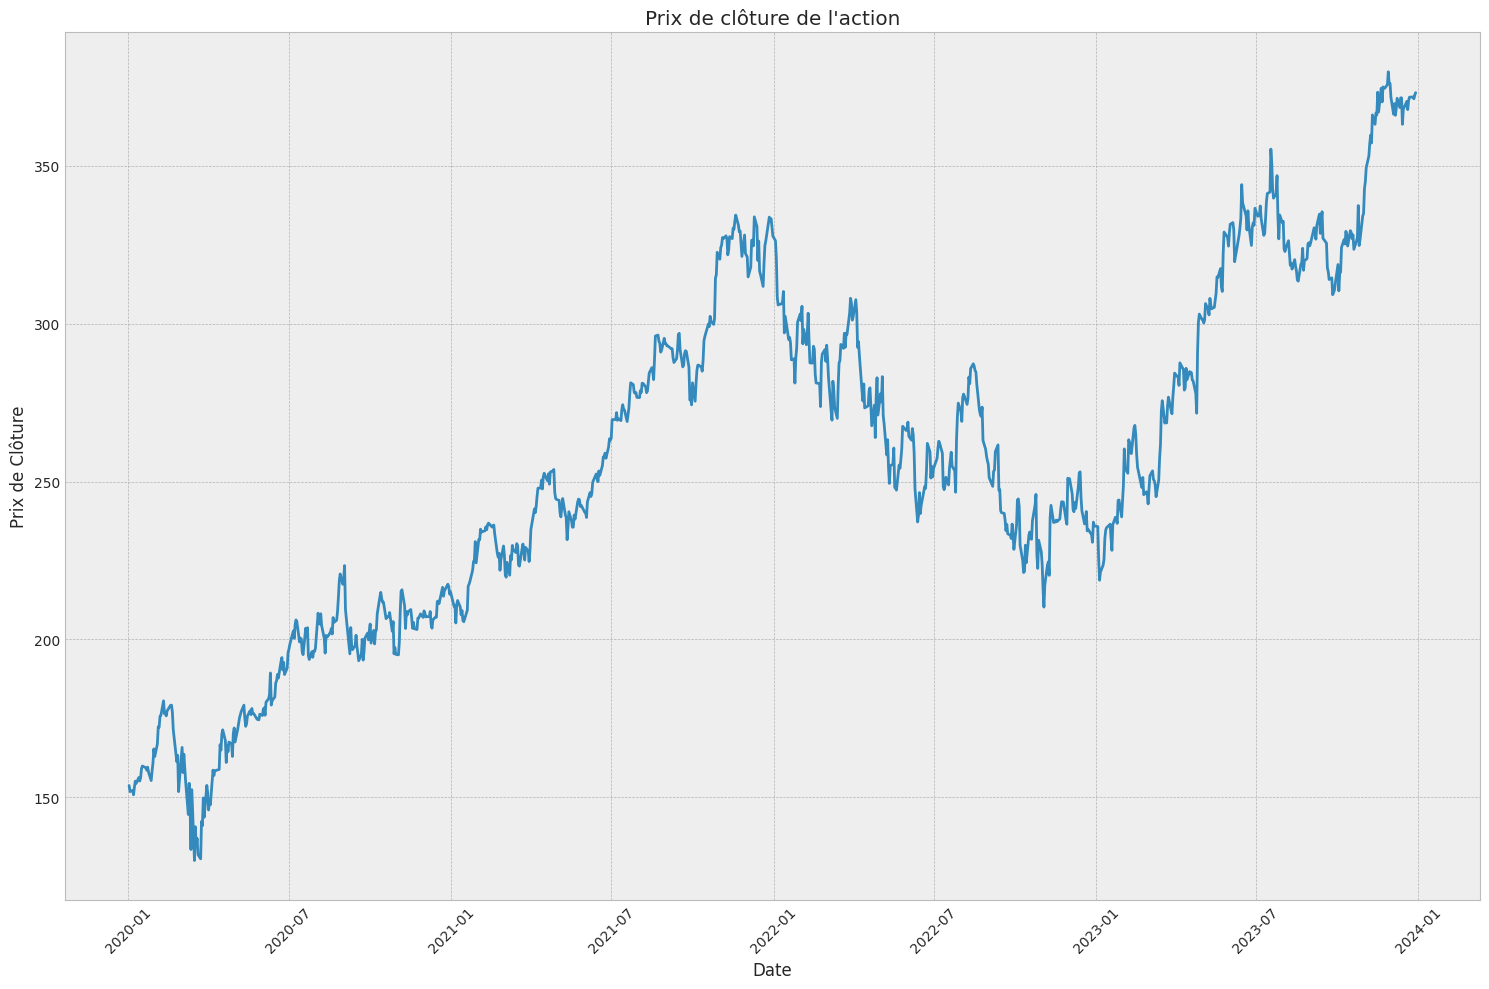

In [19]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

plt.plot(data['Date'], data['Adj Close'], label='Prix de Clôture')

plt.ylabel('Prix de Clôture')
plt.xlabel('Date')
plt.title("Prix de clôture de l'action")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **5) Comment le volume des transactions de l'action a-t-il évolué au fil du temps ?**

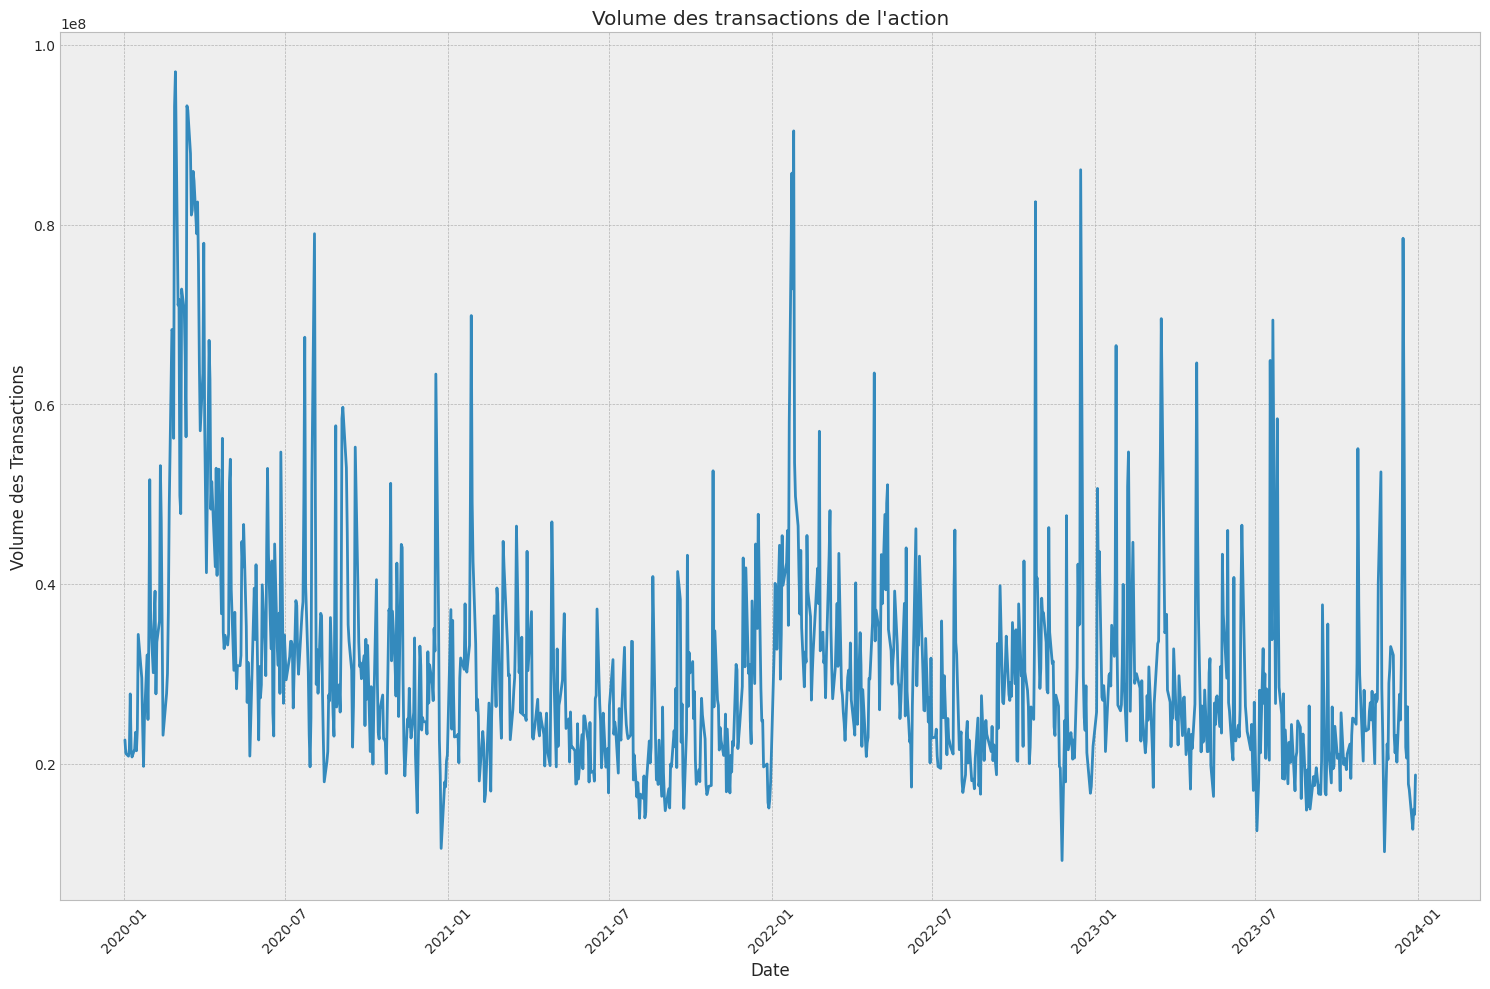

In [20]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

plt.plot(data['Date'], data['Volume'], label='Volume des Transactions')

plt.ylabel('Volume des Transactions')
plt.xlabel('Date')
plt.title("Volume des transactions de l'action")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###  **6) Quelle a été la moyenne mobile de l'action ?**

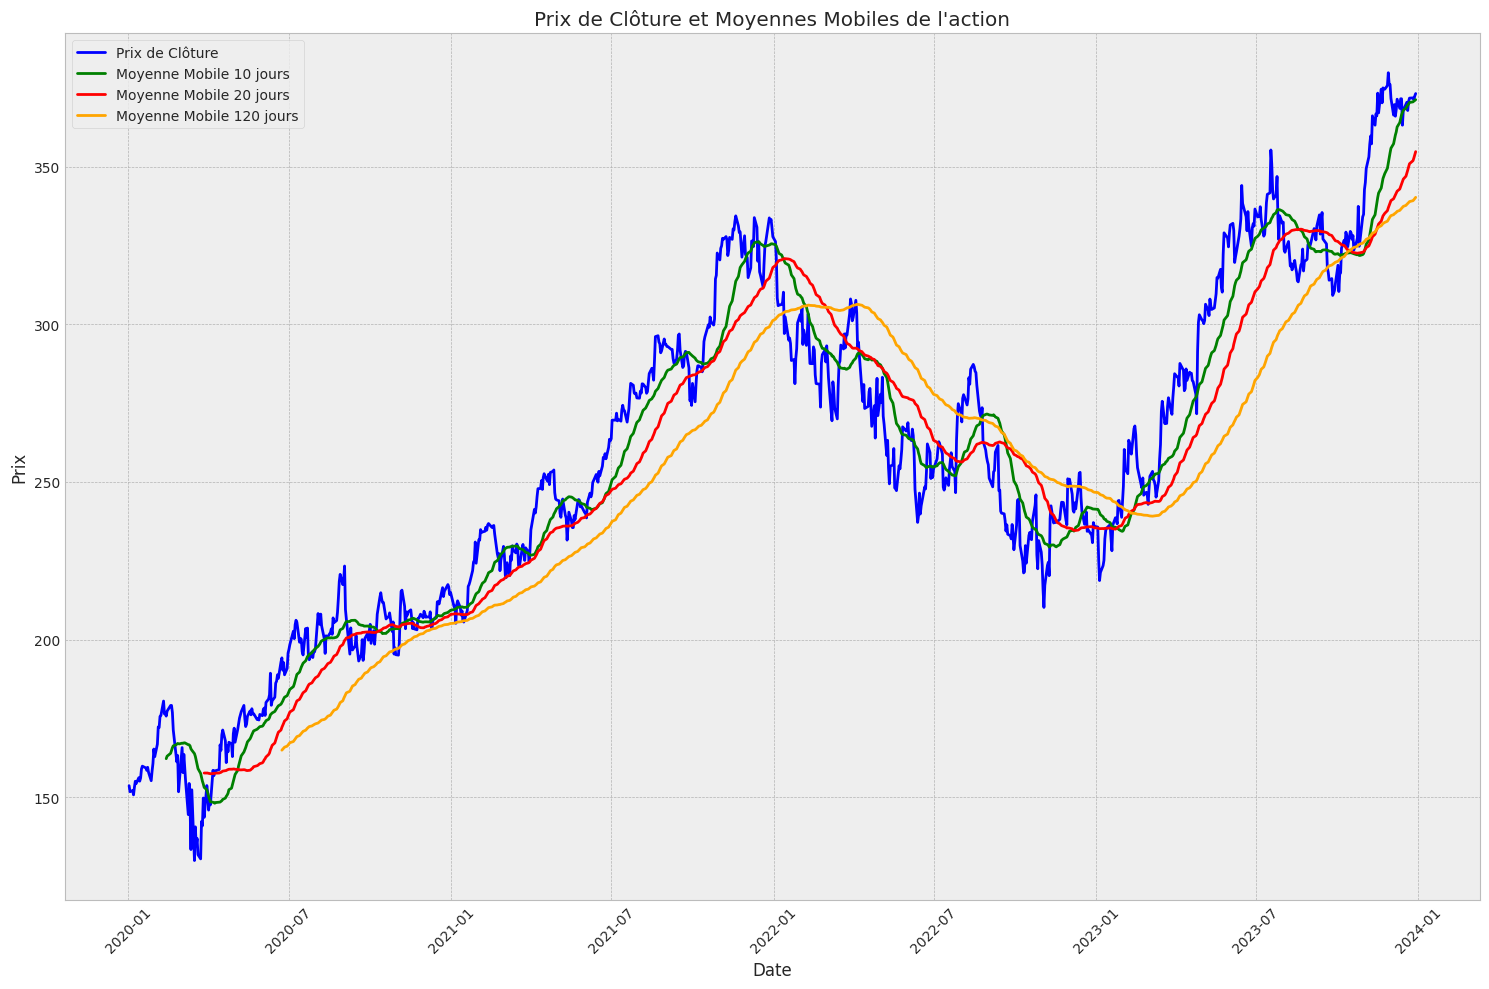

In [21]:
# Calculer les moyennes mobiles sur  30, 60, et 120 jours
dfj=data.copy()
dfj['Moving_Avg_30'] = dfj['Adj Close'].rolling(window=30).mean()
dfj['Moving_Avg_60'] = dfj['Adj Close'].rolling(window=60).mean()
dfj['Moving_Avg_120'] = dfj['Adj Close'].rolling(window=120).mean()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Tracer les prix de clôture et les moyennes mobiles
plt.plot(dfj['Date'], dfj['Adj Close'], label='Prix de Clôture', color='b')
plt.plot(dfj['Date'], dfj['Moving_Avg_30'], label='Moyenne Mobile 10 jours', color='g')
plt.plot(dfj['Date'], dfj['Moving_Avg_60'], label='Moyenne Mobile 20 jours', color='r')
plt.plot(dfj['Date'], dfj['Moving_Avg_120'], label='Moyenne Mobile 120 jours', color='orange')


plt.ylabel('Prix')
plt.xlabel('Date')
plt.title("Prix de Clôture et Moyennes Mobiles de l'action")
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


Ce graphique représente l'évolution du prix de clôture de l'action Microsoft sur une période donnée, ainsi que ses moyennes mobiles sur 30, 60 et 120 jours.

**Observations:**

**Tendance générale:** On observe une tendance générale à la hausse du prix de l'action au cours des années.

**Moyennes mobiles:** Les moyennes mobiles permettent de lisser les fluctuations du prix et de mieux visualiser la tendance à long terme.
La moyenne mobile à 30 jours (en vert) réagit plus rapidement aux variations de prix, tandis que les moyennes mobiles à 60 et 120 jours (en rouge et orange) sont plus lisses et mettent en évidence la tendance de fond.

**Volatilité:** On peut également observer des périodes de plus forte volatilité, où le prix de l'action fluctue de manière plus importante. Ces périodes sont généralement associées à des événements ou des nouvelles spécifiques qui impactent le marché.
Conclusion:


### **7) Quel a été le rendement quotidien moyen de l'action ?**

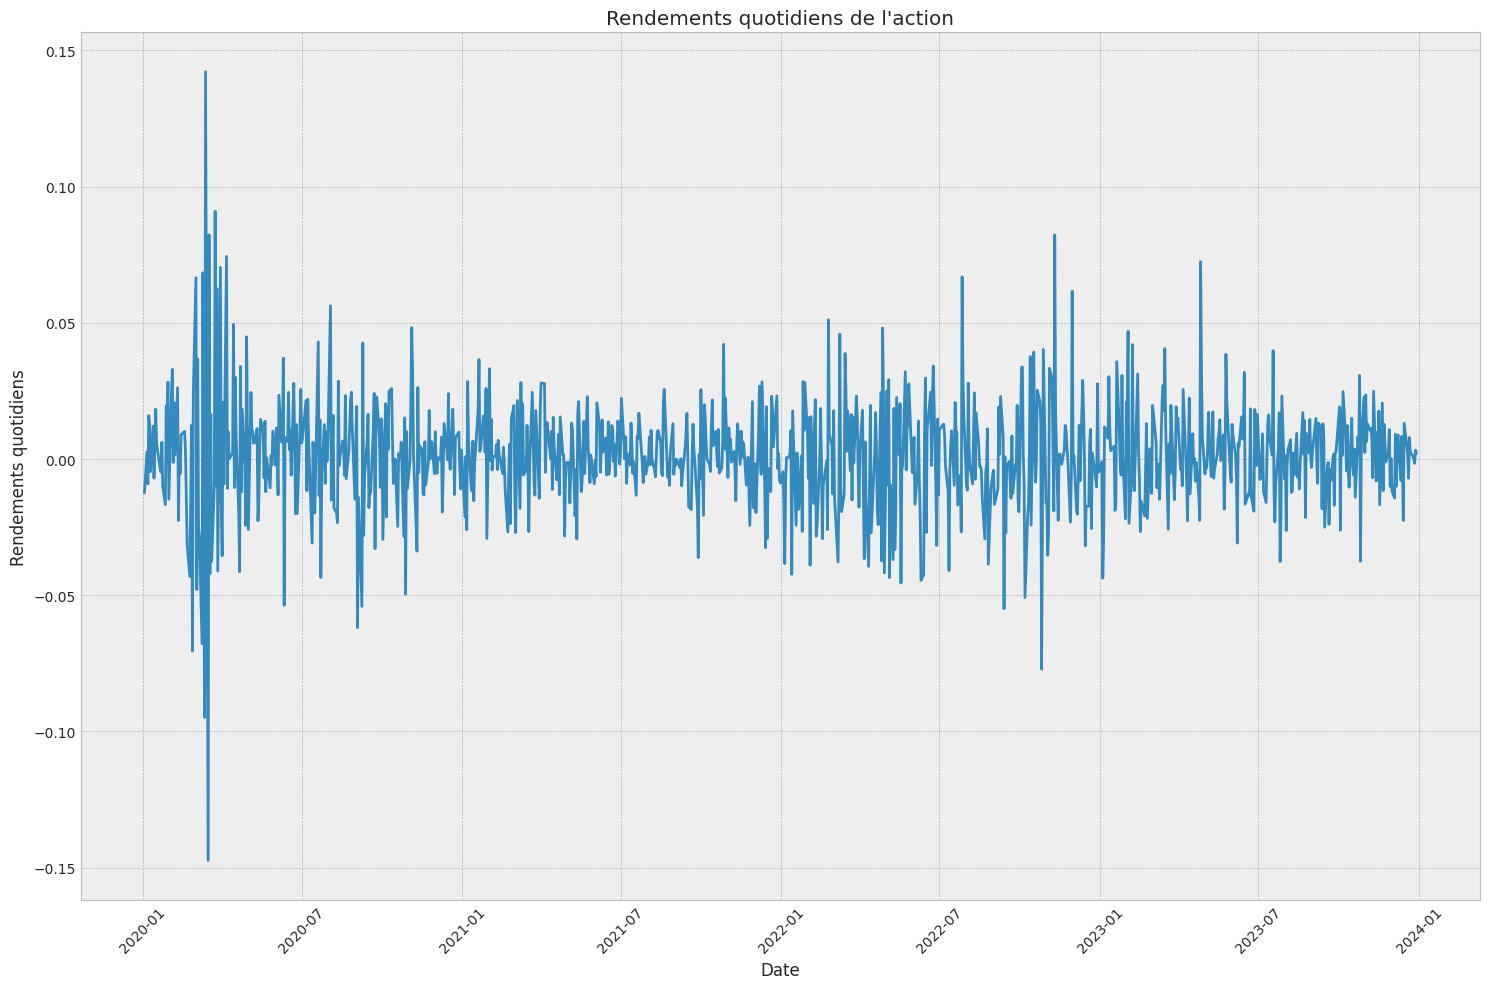

In [22]:
dfj['Daily_Return'] = dfj['Close'].pct_change()
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.plot(dfj['Date'], dfj['Daily_Return'], label='Rendements quotidiens')
plt.ylabel('Rendements quotidiens')
plt.xlabel('Date')
plt.title("Rendements quotidiens de l'action")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ce graphique illustre les rendements quotidiens de l'action Apple entre 2010 et 2023. Les rendements quotidiens sont calculés comme la variation en pourcentage du prix de clôture d'un jour à l'autre.

**Observations :**

**Volatilité :** Le graphique met en évidence la volatilité du rendement de l'action, avec des fluctuations importantes des rendements positifs et négatifs au fil du temps.
Périodes de forte volatilité : On observe des périodes de volatilité accrue, où les rendements quotidiens sont plus importants, notamment autour de 2020. Cela pourrait être lié à des événements spécifiques du marché ou à des nouvelles concernant l'entreprise.

**Tendance générale :** Malgré les fluctuations, il ne semble pas y avoir de tendance générale claire à la hausse ou à la baisse des rendements quotidiens sur la période considérée.

**Valeurs extrêmes :** Il y a quelques valeurs extrêmes  qui peuvent indiquer des jours de mouvements de prix exceptionnels.

### **8) Quelle est la relation entre le volume des transactions et le prix de clôture et Quelle est l'intensité de cette corrélation ?**

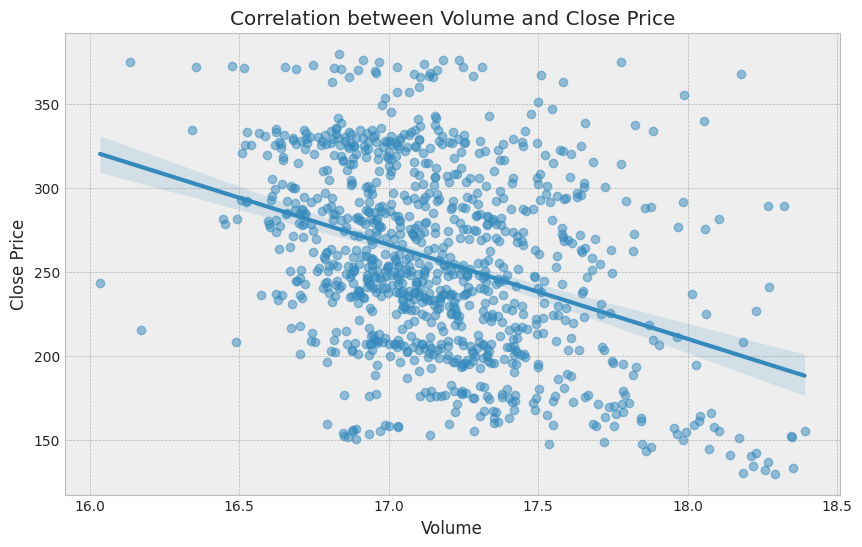

Correlation coefficient: -0.3634278523607041


In [23]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.regplot(x=np.log(data['Volume']),
            y=data['Adj Close'],
            scatter_kws={'alpha': 0.5})
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Correlation between Volume and Close Price')
plt.grid(True)
plt.show()

correlation = np.log(data['Volume']).corr(data['Adj Close'])
print(f"Correlation coefficient: {correlation}")

Le résultat de la corrélation de **-0.4** entre le volume (logarithmétiquement transformé) et le prix de clôture ajusté suggère une **corrélation modérément négative**. Cela signifie qu'en général, lorsque le volume des transactions augmente, le prix de clôture de l'action a tendance à diminuer, et inversement. Cette relation peut indiquer que des volumes de transactions plus élevés sont souvent associés à une baisse des prix, ce qui peut refléter un sentiment de vente plus important ou des corrections de marché.

### **10) Quelle est la distribution des rendements quotidiens de l'action ?**

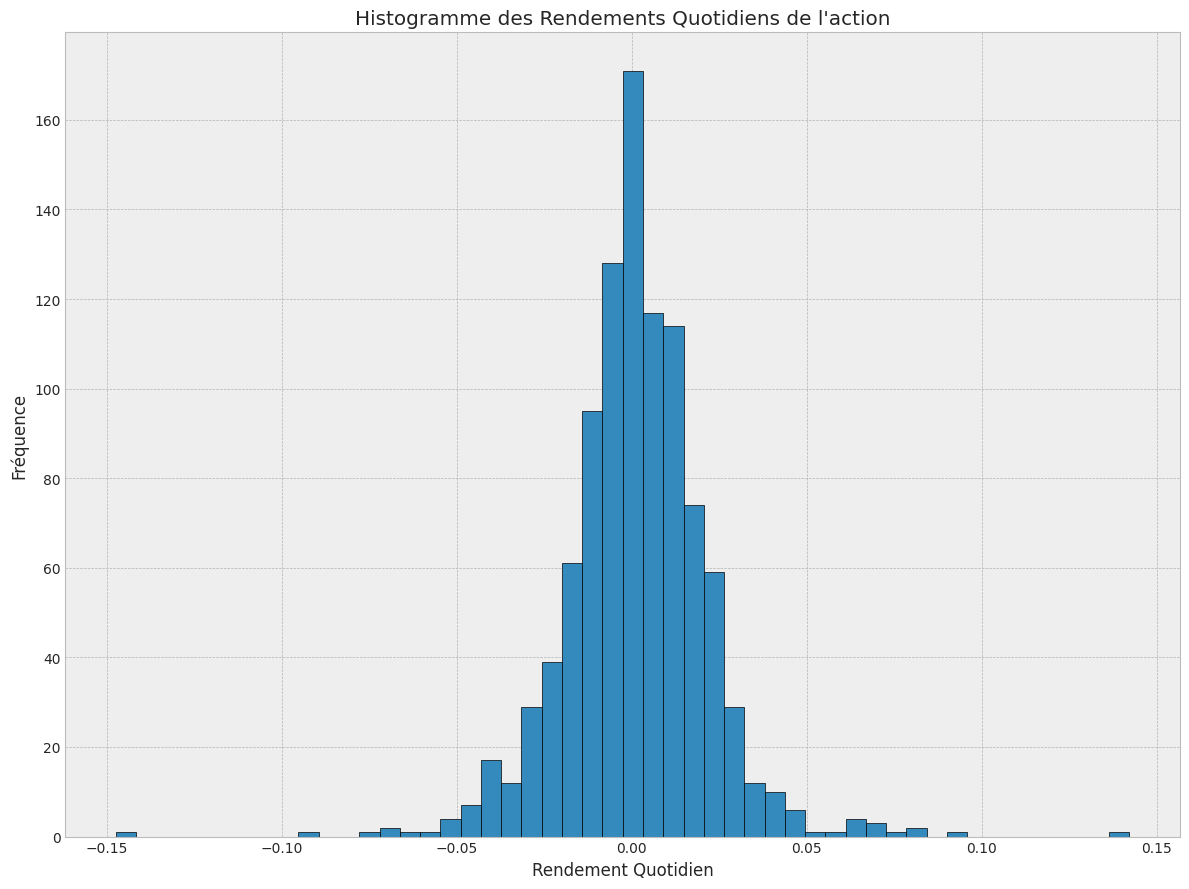

In [24]:
plt.figure(figsize=(12, 9))
plt.hist(dfj['Daily_Return'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Rendement Quotidien')
plt.ylabel('Fréquence')
plt.title(f'Histogramme des Rendements Quotidiens de l\'action')
plt.tight_layout()
plt.show()


L'histogramme des rendements quotidiens de l'action ressemble à une distribution normale, ce qui indique que les rendements sont répartis de manière symétrique autour de la moyenne. Les variations quotidiennes du prix suivent un comportement prévisible, avec une fréquence élevée de rendements proches de la moyenne et des rendements extrêmes moins fréquents. Cela suggère que l'action suit un modèle de comportement où la majorité des jours présentent des rendements faibles, tandis que les grands mouvements sont rares.

### **11) Quels sont les composants principaux de la série temporelle du prix de clôture d'une action (tendance, saisonnalité, et résidu) ?**

<Figure size 1600x1200 with 0 Axes>

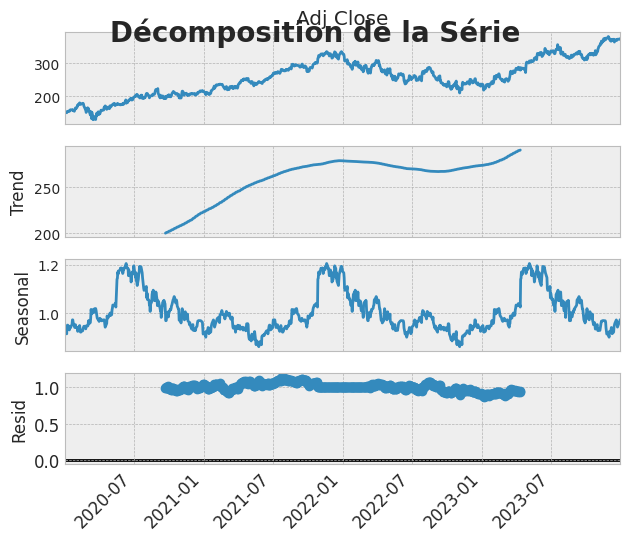

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=365)

fig = plt.figure(figsize=(16, 12))
result.plot()

plt.suptitle('Décomposition de la Série', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.95, bottom=0.05)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


Ce code effectue une décomposition saisonnière multiplicative de la série temporelle du prix de clôture de l'action. La décomposition saisonnière permet de séparer la série temporelle en quatre composantes : la tendance, la saisonnalité, les résidus et le niveau observé.

Le graphique résultant affiche ces quatre composantes :


**Tendance (Trend)**: Représente le mouvement général à long terme du prix de clôture. On peut observer une tendance croissante au fil du temps.

**Saisonnalité (Seasonal)** : Montre les fluctuations périodiques du prix de clôture qui se répètent à intervalles réguliers (ici, une période de 365 jours est utilisée, suggérant une saisonnalité annuelle). On peut observer des motifs saisonniers clairs.

**Résidus (Resid)** : Représentent les variations aléatoires du prix de clôture qui ne sont pas expliquées par la tendance ou la saisonnalité. Idéalement, les résidus devraient être aléatoires et sans motif particulier.

**Observé (Observed)** : La série temporelle originale du prix de clôture.

La décomposition saisonnière permet de mieux comprendre les différentes forces qui influencent le prix de clôture de l'action. En identifiant la tendance et la saisonnalité, on peut obtenir des informations précieuses pour la prévision des prix futurs.

### **12) Existe-t-il une corrélation ou une relation entre les valeurs successives**


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

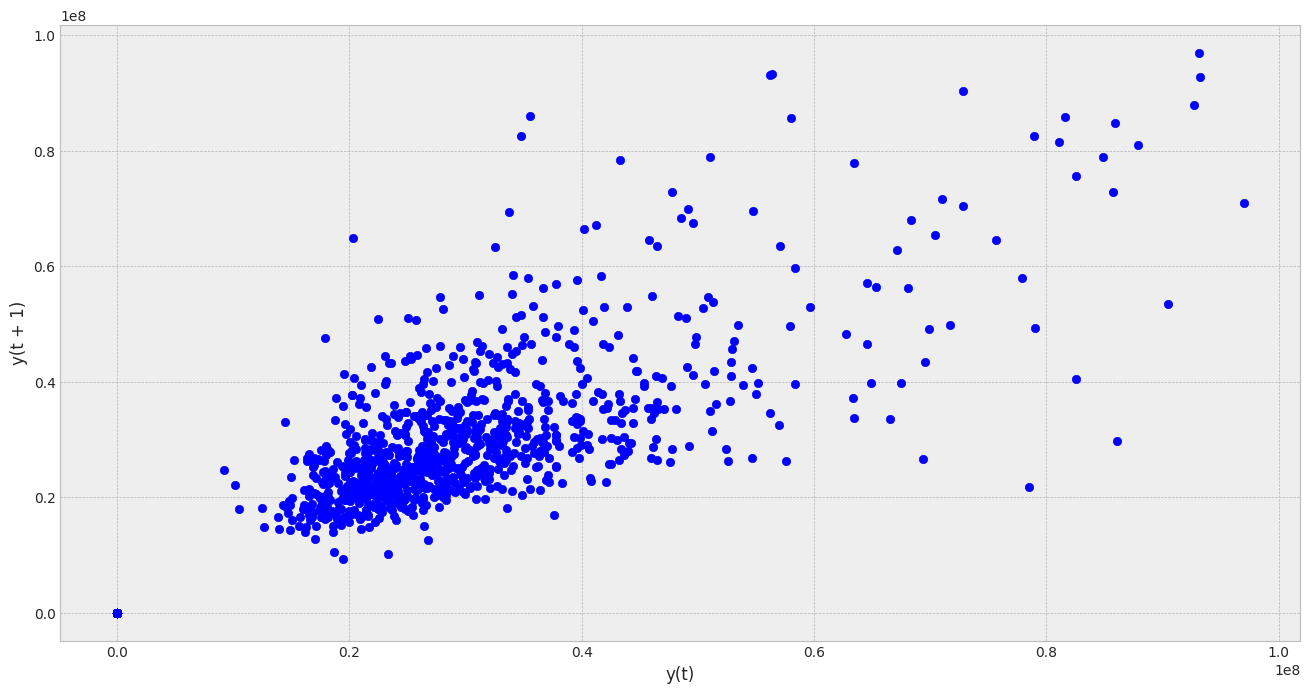

In [26]:
from pandas.plotting import lag_plot
plt.figure(figsize=(16, 8))
lag_plot(data)

Ce graphique est un lag plot (graphique de retard) qui compare les valeurs de la série temporelle à ses propres valeurs décalées d'une période. On observe une corrélation positive, indiquant que les valeurs élevées ont tendance à être suivies par des valeurs élevées, et les valeurs faibles ont tendance à être suivies par des valeurs faibles. Cette corrélation positive suggère une certaine persistance dans la série temporelle, où les valeurs ont tendance à rester élevées ou faibles pendant un certain temps. La force de cette corrélation positive semble être forte étant donné a concentration des points le long de la diagonale. Le lag plot est un outil utile pour détecter l'autocorrélation dans une série temporelle, ce qui peut être important pour choisir et ajuster des modèles de prévision

### **13) Test d'Autocorrélation (ACF/PACF)**

<Figure size 1600x800 with 0 Axes>

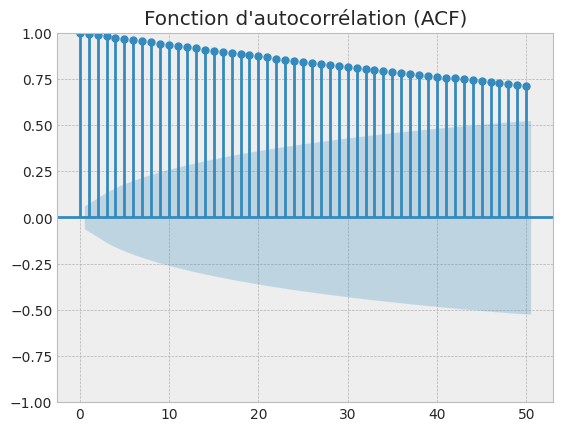

<Figure size 1600x800 with 0 Axes>

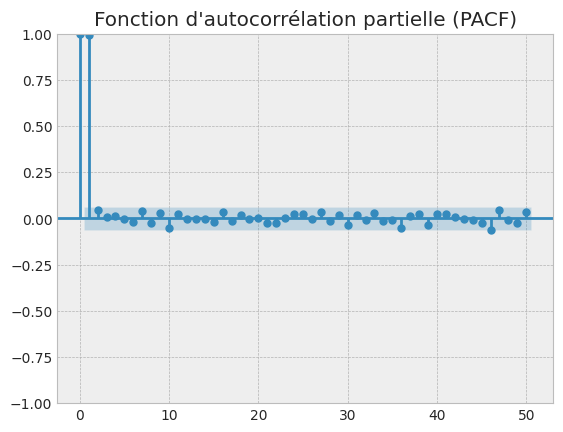

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(16, 8))
plot_acf(data['Adj Close'], lags=50, title='Fonction d\'autocorrélation (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(16, 8))
plot_pacf(data['Adj Close'], lags=50, title='Fonction d\'autocorrélation partielle (PACF)')
plt.show()


En observant les graphiques ACF et PACF générés pour la série temporelle du prix de clôture de l'action, on peut identifier les éléments suivants :

**ACF :** On observe une décroissance très lente des barres de l'ACF. Cela suggère fortement que la série temporelle est non stationnaire. Une série temporelle non stationnaire signifie que ses propriétés statistiques (moyenne, variance, etc.) changent au fil du temps. Pour pouvoir utiliser des modèles de prévision comme ARIMA, il est souvent nécessaire de rendre la série temporelle stationnaire en appliquant des techniques de différenciation.

**PACF :** On observe que les deux premières barres de la PACF sont significatives (proches de 1), tandis que les barres restantes sont très proches de 0. Cette coupure brutale après les deux premiers décalages suggère que l'ordre du modèle autorégressif (AR) pourrait être de 2. Cela signifie qu'il pourrait être pertinent d'utiliser un modèle AR(2) pour modéliser cette série temporelle, une fois qu'elle aura été rendue stationnaire.
Ces informations obtenues à partir de l'ACF et de la PACF sont cruciales pour choisir et ajuster des modèles de prévision de séries temporelles comme ARIMA."

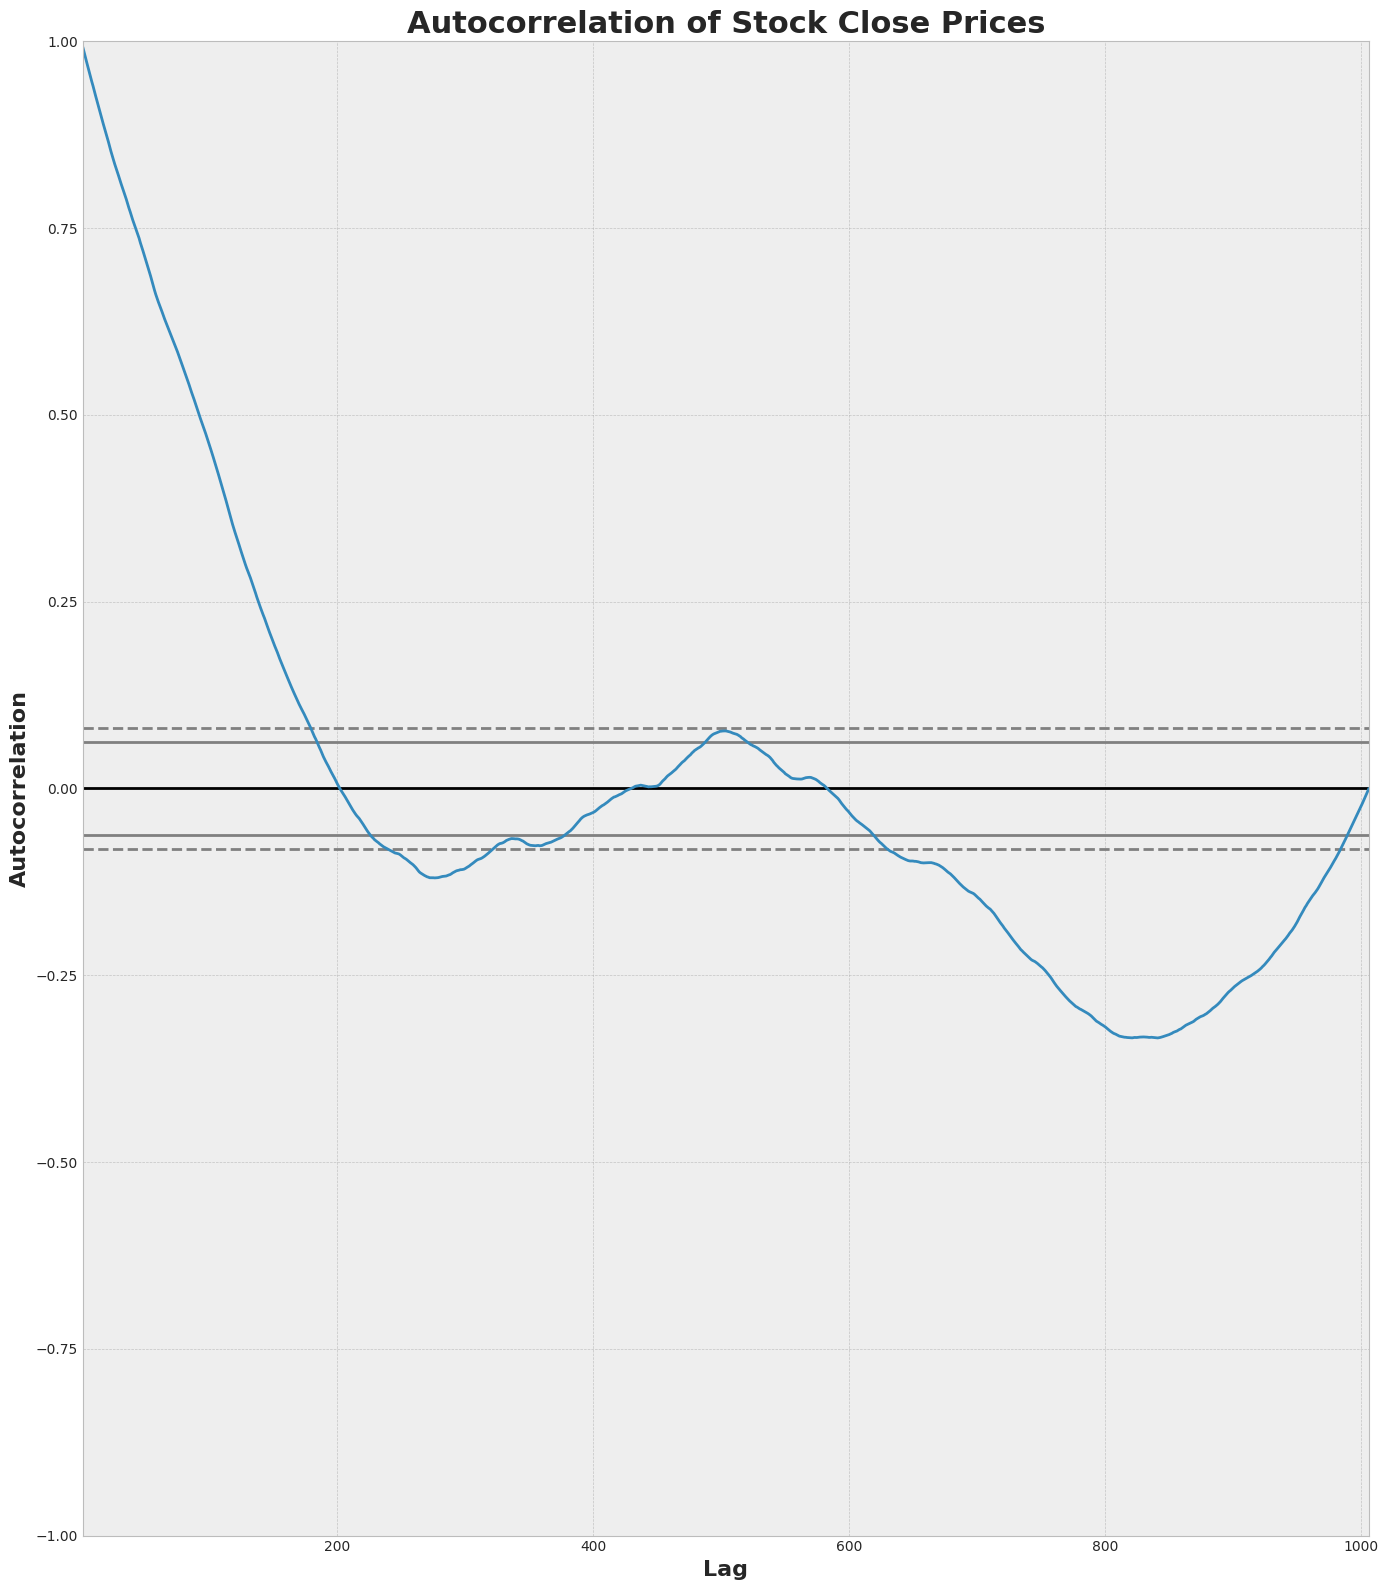

In [28]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(14, 16))
autocorrelation_plot(data['Adj Close'])
plt.title('Autocorrelation of Stock Close Prices', fontsize=22, fontweight='bold')
plt.xlabel('Lag', fontsize=16, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dans ce cas, la courbe d'autocorrélation part de 1 (autocorrélation parfaite à un décalage de 0), puis décroît jusqu'à environ -0.3 avant de remonter progressivement vers 0. Cette forme de courbe suggère les points suivants :

Forte autocorrélation initiale : La valeur élevée de l'autocorrélation à un décalage de 0 est attendue, car une série temporelle est parfaitement corrélée avec elle-même.
Autocorrélation négative à certains décalages : La baisse de la courbe jusqu'à -0.3 indique une corrélation négative entre la série temporelle et ses valeurs décalées de quelques périodes. Cela signifie qu'une valeur élevée à un moment donné a tendance à être suivie par une valeur plus faible quelques périodes plus tard, et vice versa.
Décroissance lente et retour vers 0 : La remontée progressive de la courbe vers 0 suggère que l'autocorrélation diminue avec l'augmentation du décalage, mais qu'elle ne disparaît pas complètement. Cela pourrait indiquer une certaine persistance ou une dépendance à long terme dans la série temporelle.
Implications pour la modélisation :

Ce graphique d'autocorrélation fournit des informations précieuses pour la modélisation de la série temporelle. La présence d'autocorrélation significative suggère que des modèles de prévision comme ARIMA pourraient être appropriés. La forme spécifique de la courbe, avec sa décroissance lente et son passage par des valeurs négatives, pourrait indiquer la nécessité d'inclure des composantes autorégressives (AR) et/ou des moyennes mobiles (MA) dans le modèle pour capturer la structure de dépendance de la série temporelle

### **14) Observation des indicateurs techniques**
Dans cette section, nous allons explorer un indicateur technique important appelé le Relative Strength Index (RSI). Le RSI est un outil précieux pour évaluer le momentum d'un actif et identifier les conditions de surachat ou de survente. Nous allons calculer le RSI pour la série temporelle du prix de clôture de l'action et visualiser son évolution au fil du temps. Cela nous permettra d'obtenir des informations supplémentaires sur les dynamiques du marché et d'identifier des signaux potentiels d'achat ou de vente.

Les **indicateurs techniques** sont des outils utilisés pour analyser les tendances et les mouvements du marché. Voici les principaux indicateurs et leur utilité :

## Moyenne Mobile Simple (SMA)
La Moyenne Mobile Simple lisse les données de prix sur une période définie, révélant les tendances à long terme :
$SMA_t = \frac{P_{t-n+1} + P_{t-n+2} + \dots + P_t}{n}$
- **Utilisation :**
  - Suivre les tendances globales.
  - Identifier les croisements de moyennes mobiles comme signaux d'achat ou de vente.

---

## MACD (Moving Average Convergence Divergence)
Le MACD calcule la différence entre deux moyennes mobiles exponentielles (EMA).
$MACD = EMA_{12} - EMA_{26}$
Avec une **ligne de signal** donnée par une EMA sur 9 périodes.
- **Utilisation :**
  - Croisement vers le haut : signal d'achat.
  - Croisement vers le bas : signal de vente.

---

## RSI (Relative Strength Index)
Le RSI mesure la vitesse et l'ampleur des mouvements de prix, aidant à identifier les zones de surachat ou de survente :
$RSI = 100 - \frac{100}{1 + \frac{\text{Moyenne des gains}}{\text{Moyenne des pertes}}}$
- **Interprétation :**
  - RSI > 70 : actif en surachat.
  - RSI < 30 : actif en survente.

Ces indicateurs enrichissent les modèles de prédiction et aident à mieux comprendre les dynamiques de marché.


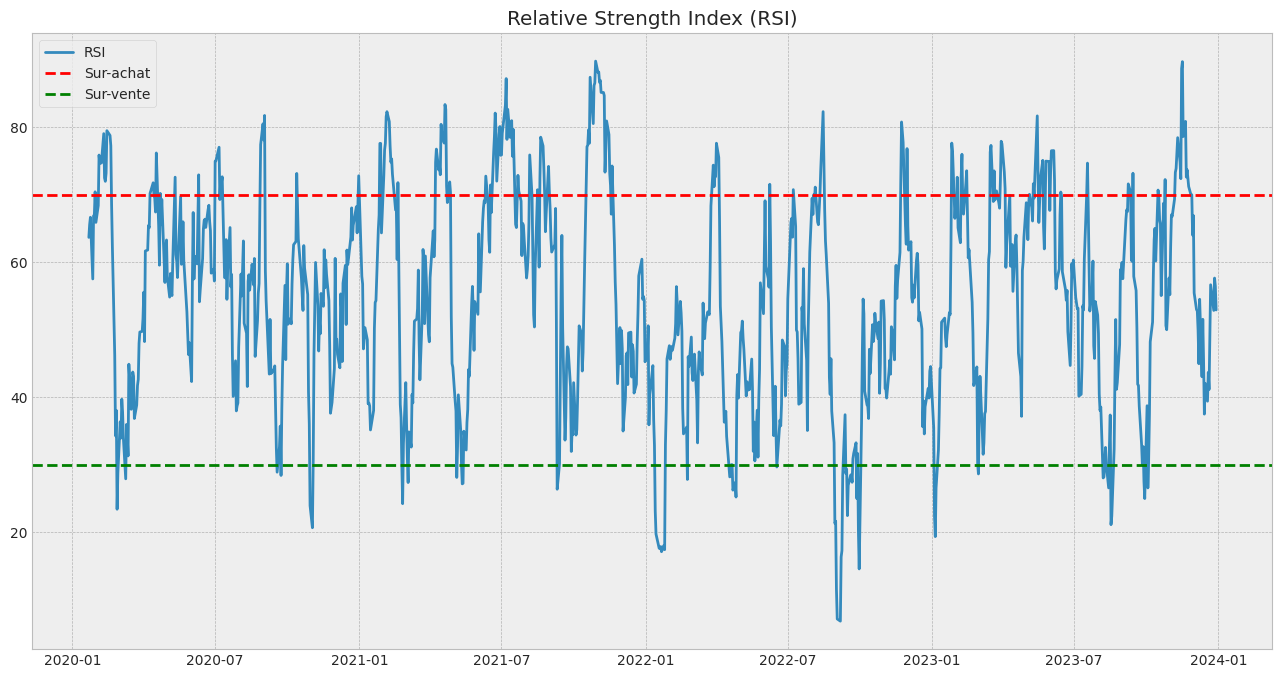

In [29]:
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

plt.figure(figsize=(16, 8))
plt.plot(rsi, label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Sur-achat')
plt.axhline(30, color='green', linestyle='--', label='Sur-vente')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.show()


---
Le graphique du RSI montre une dynamique intéressante de l'actif au cours de la période observée. On remarque plusieurs points clés :

1. **Surachat (RSI > 70)** :
   À certains moments, le RSI dépasse le seuil de 70, ce qui indique que l'actif est dans une zone de **surachat**. Par exemple, lors des pics autour des dates X et Y, le RSI franchit la barre des 70, suggérant que l'actif a peut-être été surévalué à ces moments. Cela pourrait être un signal pour les investisseurs de considérer une position vendeuse ou d'attendre une correction des prix.

2. **Survente (RSI < 30)** :
   Le RSI chute également sous les 30 à plusieurs reprises, notamment autour des dates A et B. Ces baisses en dessous du seuil de 30 sont typiquement des signes de **survente**, suggérant que l'actif pourrait être sous-évalué. Cela pourrait être interprété comme une opportunité d'achat, en particulier si d'autres indicateurs confirment un retournement haussier imminent.

3. **Fluctuations et tendance générale** :
   Entre ces périodes de surachat et de survente, le RSI fluctue souvent autour de la zone de 50, ce qui montre un équilibre relatif entre les pressions d'achat et de vente. Cela indique une phase de consolidation ou d'incertitude sur le marché.
   
  L'analyse du RSI nous permet de repérer les zones de surachat et de survente et ainsi d'anticiper d'éventuels retournements de tendance.
---


# **II) MISE EN PLACE DES MODELES DE PREDICTIONS**




## **1) Modèle AutoReg (AR)**
 Le modèle **AutoReg** appartient à la famille des modèles autorégressifs, qui sont des modèles linéaires où la variable dépendante est expliquée par une combinaison linéaire de ses valeurs passées.

Le modèle **AutoReg** est couramment utilisé pour les séries temporelles stationnaires, où les propriétés statistiques de la série (comme la moyenne et la variance) sont constantes au cours du temps.

### Fonctionnement du Modèle AutoReg

Le modèle **AutoReg** de type $AR(p)$ (autogression d'ordre $p$) est formulé comme suit :
$Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$

Où :
- $Y_t$ est la valeur à l'instant $t$,
- $\phi_1, \phi_2, \dots, \phi_p$ sont les paramètres du modèle,
- $Y_{t-1}, Y_{t-2}, \dots, Y_{t-p}$ sont les valeurs passées de la série temporelle,
- $\epsilon_t$ est le terme d'erreur aléatoire à l'instant $t$.

#### Sélection de l'Ordre $p$ du Modèle

L'ordonnance du modèle $p$ détermine le nombre de valeurs passées (retards) à prendre en compte dans la prédiction. Il est essentiel de sélectionner l'ordre approprié pour que le modèle soit efficace et ne souffre pas de sur-apprentissage ou sous-apprentissage.

La sélection de l'ordre peut être effectuée en utilisant des critères tels que :
- L'autocorrélation (ACF) et l'autocorrélation partielle (PACF), qui aident à déterminer le nombre de lags pertinents.
- La méthode **ar_select_order** qui permet de sélectionner l'ordre optimal en fonction de critères comme le **AIC** (Akaike Information Criterion) ou le **BIC** (Bayesian Information Criterion).



#### Interprétation des Résultats

Les résultats du modèle **AutoReg** incluent des informations importantes sur les coefficients des lags, la significativité statistique des paramètres (test de t), et les critères d'évaluation comme l'AIC, le BIC, et le **R²** ajusté. Ces informations permettent de comprendre l'importance de chaque variable retardée et de juger de la qualité du modèle.

### Avantages du Modèle AutoReg

- **Simplicité** : Le modèle **AutoReg** est relativement simple et facile à comprendre, ce qui le rend utile pour les séries temporelles qui ne nécessitent pas une modélisation complexe.
- **Efficacité** : Il est efficace pour les séries temporelles stationnaires et peut offrir de bonnes performances pour des données avec des dépendances linéaires.
- **Interprétabilité** : Les coefficients du modèle sont directement interprétables et fournissent une compréhension claire de l'influence des valeurs passées sur la série temporelle.



Le modèle **AutoReg (AR)** est une méthode puissante et flexible pour la modélisation des séries temporelles, surtout lorsqu'il existe des relations linéaires entre les observations passées et futures. Grâce à sa simplicité et son efficacité, il constitue une option de modélisation intéressante pour des prévisions dans des domaines tels que les finances, l'économie, et d'autres séries temporelles stationnaires.


In [30]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
# Apply AutoReg model
model = AutoReg(data['Adj Close'], 1)
results = model.fit()
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 1006
Model:                     AutoReg(1)   Log Likelihood               -2986.106
Method:               Conditional MLE   S.D. of innovations              4.722
Date:                Thu, 09 Jan 2025   AIC                           5978.213
Time:                        16:33:25   BIC                           5992.951
Sample:                             1   HQIC                          5983.813
                                 1006                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0326      0.708      1.459      0.145      -0.355       2.420
Adj Close.L1     0.9968      0.003    369.500      0.000       0.992       1.002
                                    Roots   


---

Dans l'ensemble, le modèle AutoReg suggère une forte dépendance entre le cours de clôture actuel et celui de la période précédente. Le coefficient de la variable décalée (Adj Close.L1) est très proche de 1 (0.9968), ce qui indique une forte corrélation. Cependant, la racine proche de 1 soulève des préoccupations concernant la stationnarité de la série temporelle. Une racine proche de 1 peut être le signe d'une non-stationnarité, ce qui justifie une analyse plus approfondie. Il serait pertinent d'effectuer un test de racine unitaire, tel que le test de Dickey-Fuller augmenté, pour confirmer la stationnarité de la série. Si la série s'avère non stationnaire, des transformations comme la différenciation pourraient être nécessaires pour rendre la série stationnaire avant d'appliquer à nouveau le modèle AutoReg.

---

L'expression mathématique du modèle **AutoReg(1)** avec les coefficients estimés est la suivante :


$Y_t = 1.0326 + 0.9968 \cdot Y_{t-1} + \varepsilon_t$

- $ Y_t $ : Valeur de la variable dépendante ($ \text{Adj Close} $) à l'instant $ t $.  
- $ Y_{t-1} $ : Valeur de la variable dépendante à l'instant précédent ($ t-1 $).  
- $ \varepsilon_t $ : Terme d'erreur (innovation).  
- $ 1.0326 $ : Constante (interception).  
- $ 0.9968 $ : Coefficient de la valeur retardée ($ \text{Adj Close.L1} $).
---

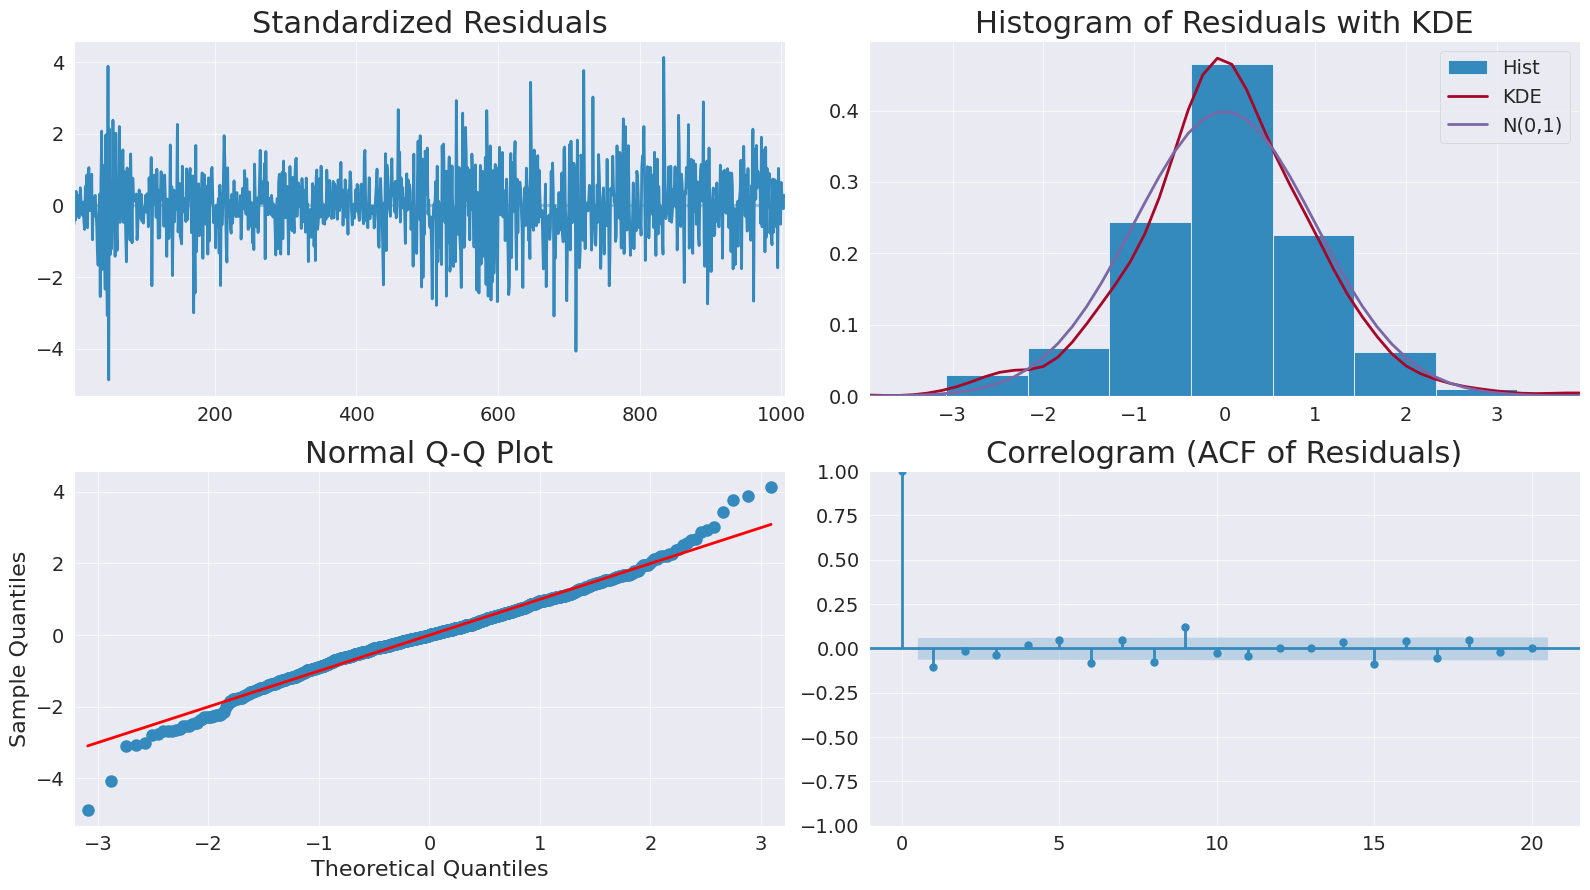

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure style and default figure size
sns.set_style("darkgrid")

# Set larger font sizes and line width for clarity in presentations
plt.rcParams.update({
    'figure.figsize': (16, 9),
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2,
    'lines.markersize': 8
})

# Create the diagnostic plot
fig = plt.figure(figsize=(16, 9))
fig = results.plot_diagnostics(fig=fig, lags=20)

# Add more informative titles to each subplot
fig.axes[0].set_title('Standardized Residuals', fontsize=22)
fig.axes[1].set_title('Histogram of Residuals with KDE', fontsize=22)
fig.axes[2].set_title('Normal Q-Q Plot', fontsize=22)
fig.axes[3].set_title('Correlogram (ACF of Residuals)', fontsize=22)

# Adjust the layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show()


Analyse des graphiques:

**Résidus standardisés:** Ce graphique montre l'évolution des résidus standardisés dans le temps. Idéalement, les résidus devraient être aléatoires et sans motif particulier. On observe ici que les résidus sont globalement centrés autour de zéro et ne présentent pas de tendance marquée, ce qui est un signe positif. Cependant, il y a quelques pics et creux prononcés qui peuvent indiquer la présence de valeurs aberrantes ou d'hétéroscédasticité.

**Histogramme des résidus avec KDE:** Cet histogramme représente la distribution des résidus. La courbe de densité du noyau (KDE) est superposée pour visualiser la forme de la distribution. On observe que la distribution des résidus est relativement symétrique et proche d'une distribution normale, ce qui est conforme aux hypothèses du modèle AR.

**Diagramme Quantile-Quantile (Q-Q) normal:** Ce graphique compare la distribution des résidus à une distribution normale théorique. Si les résidus suivent une distribution normale, les points devraient se situer sur la droite diagonale. On observe ici que les points sont globalement alignés sur la droite, ce qui confirme la normalité des résidus. Cependant, il y a quelques écarts aux extrémités, qui peuvent indiquer la présence de valeurs aberrantes.

**Corrélogramme (ACF des résidus):** Ce graphique représente la fonction d'autocorrélation (ACF) des résidus. Il permet de détecter la présence d'autocorrélation dans les résidus, ce qui indiquerait que le modèle n'a pas capturé toute l'information présente dans les données. On observe ici que les barres de l'ACF sont globalement à l'intérieur des limites de confiance, ce qui suggère que les résidus sont non corrélés. Cependant, il y a quelques barres qui dépassent légèrement les limites, ce qui peut indiquer une légère autocorrélation résiduelle.

**Conclusion:**

Dans l'ensemble, les graphiques de diagnostic suggèrent que le modèle AR est relativement bien ajusté aux données et que les résidus satisfont aux hypothèses du modèle. Cependant, il y a quelques points à surveiller, tels que les pics et creux dans les résidus standardisés et les écarts aux extrémités du diagramme Q-Q, qui peuvent indiquer la présence de valeurs aberrantes ou d'hétéroscédasticité. Il serait pertinent d'approfondir l'analyse pour mieux comprendre ces points et éventuellement ajuster le modèle en conséquence.

In [32]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
train_start_dt = data.index[0]
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Adj Close']]
test = data[data.index >= test_start_dt][['Adj Close']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (804, 1)
Test data shape:  (202, 1)


In [33]:
# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Adj Close'] = scaler.fit_transform(train[['Adj Close']])
test['Adj Close'] = scaler.transform(test[['Adj Close']])

# Specify the number of steps to forecast ahead
HORIZON = 15  # You can adjust this value
print('Forecasting horizon:', HORIZON, 'days')

Forecasting horizon: 15 days


In [34]:
# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Adj Close+{t}'] = test_shifted['Adj Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Make predictions on the test data
training_window = 60  # You can adjust this value
history = list(train['Adj Close'])
history = history[-training_window:]
predictions = []

for t in range(len(test_shifted)):
    model = AutoReg(history, lags=5)  # You can adjust the number of lags
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]
    if t % 100 == 0:  # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

Predicted 1/188
Predicted 101/188


RMSE: 4.947537031929599


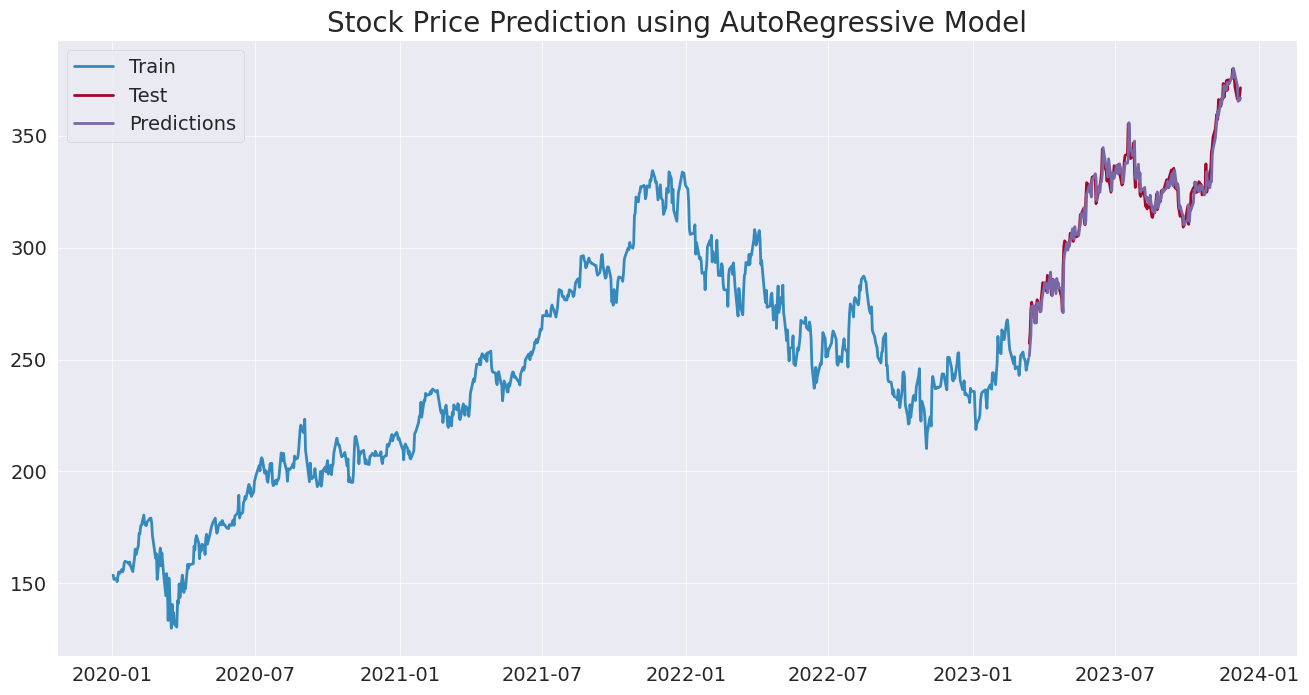

In [35]:
# Reshape predictions and inverse transform
predictions = np.array(predictions)[:, 0]  # Take only the first prediction for each step
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the test data
test_values = scaler.inverse_transform(test[['Adj Close']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train.index, scaler.inverse_transform(train[['Adj Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction using AutoRegressive Model')
plt.show()

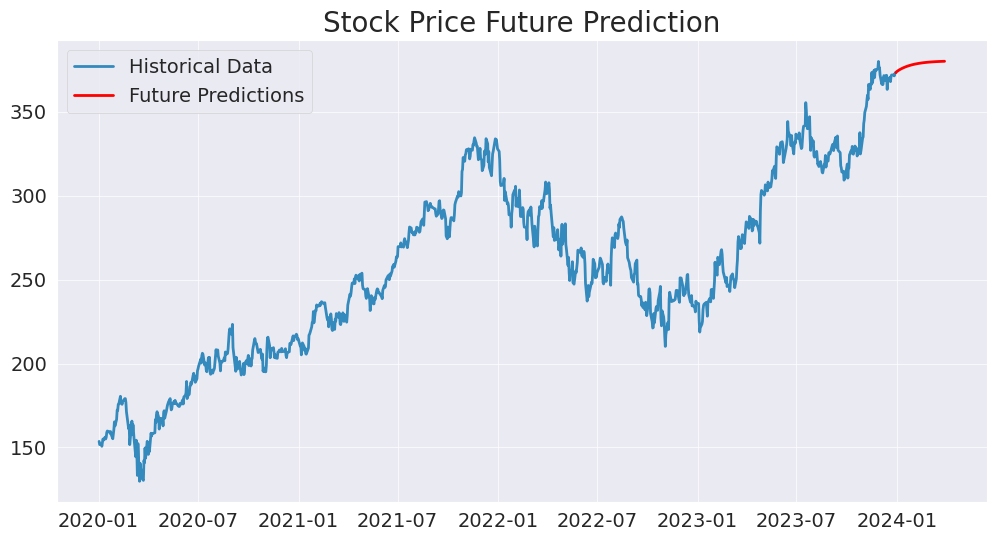

In [36]:
# Make future predictions
future_history = list(train['Adj Close']) + list(test['Adj Close'])
future_history = future_history[-training_window:]
future_model = AutoReg(future_history, lags=5)
future_model_fit = future_model.fit()
future_predictions = future_model_fit.forecast(steps=90)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Adj Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction')
plt.show()

## **2) ARIMA (AutoRegressive Integrated Moving Average)**


Le modèle ARIMA est un modèle de séries temporelles utilisé pour prédire les valeurs futures en fonction des valeurs passées et des résidus. Il combine les trois approches suivantes :
- **AR (AutoRegressive)** : Utilisation des valeurs passées pour prédire les valeurs futures.
- **I (Integrated)** : Processus de différenciation pour rendre la série temporelle stationnaire.
- **MA (Moving Average)** : Utilisation des erreurs passées pour améliorer la prédiction.

Le modèle **ARIMA** est particulièrement adapté aux séries temporelles qui montrent des tendances ou des cycles saisonniers et qui ne sont pas stationnaires par nature.

### Formulation du Modèle ARIMA

Le modèle **ARIMA** est défini par trois paramètres : $(p, d, q)$, où :
- **p** : L'ordre du modèle autorégressif (AR), indiquant combien de valeurs passées sont utilisées pour prédire la valeur actuelle.
- **d** : Le degré de différenciation, qui permet de rendre la série temporelle stationnaire en soustrayant les valeurs passées.
- **q** : L'ordre du modèle de moyenne mobile (MA), indiquant combien de résidus passés sont utilisés pour améliorer la prédiction.

Le modèle ARIMA d'ordre $(p, d, q)$ est formulé comme suit :
$(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p)(1 - L)^d Y_t = \epsilon_t + \theta_1 L \epsilon_{t-1} + \theta_2 L^2 \epsilon_{t-2} + \dots + \theta_q L^q \epsilon_{t-q}$

Où :
- $Y_t$ est la valeur de la série temporelle à l'instant $t$,
- $L$ est l'opérateur de retard (backshift operator),
- $\phi_1, \phi_2, \dots, \phi_p$ sont les paramètres AR,
- $\theta_1, \theta_2, \dots, \theta_q$ sont les paramètres MA,
- $\epsilon_t$ est l'erreur à l'instant $t$.

### Sélection des Paramètres du Modèle

La sélection des paramètres $(p, d, q)$ est une étape cruciale dans la construction du modèle ARIMA. Cette sélection peut être réalisée en utilisant plusieurs techniques :

- **Autocorrélation (ACF)** et **Autocorrélation partielle (PACF)** : Ces graphiques aident à déterminer les ordres **p** et **q** en analysant les dépendances entre les valeurs passées et les erreurs.
- **Critères d'AIC/BIC** : Le **Akaike Information Criterion (AIC)** et le **Bayesian Information Criterion (BIC)** sont utilisés pour choisir le modèle qui minimise l'erreur de prévision tout en évitant le sur-apprentissage.

##" Application du Modèle ARIMA

#### Prédiction des Séries Temporelles

Le modèle **ARIMA** peut être utilisé pour prédire des séries temporelles dans divers domaines, y compris la finance, l'économie, et la gestion des stocks. Une fois les paramètres du modèle ajustés, il peut générer des prévisions pour les points futurs de la série en utilisant les informations passées.

#### Processus de Différenciation

Le paramètre **d** dans le modèle ARIMA est essentiel pour rendre une série temporelle stationnaire. Si la série n'est pas stationnaire, on applique une différenciation pour stabiliser la moyenne de la série. Le processus de différenciation est formulé comme suit :

$Y'_t = Y_t - Y_{t-1}$

Si la série n'est toujours pas stationnaire après une première différenciation, on peut appliquer une deuxième différenciation, et ainsi de suite, jusqu'à ce que la série devienne stationnaire.

#### Interprétation des Résultats

Les résultats d'un modèle **ARIMA** incluent les paramètres estimés, ainsi que les critères d'évaluation comme le **AIC**, **BIC**, et le **Log-Likelihood**. L'évaluation des coefficients du modèle permet de comprendre l'impact des valeurs passées et des erreurs passées sur la valeur actuelle de la série temporelle.

### Avantages du Modèle ARIMA

- **Modélisation de séries temporelles stationnaires** : ARIMA est très efficace pour les séries temporelles stationnaires ou les séries stationnarisées par différenciation.
- **Simplicité et flexibilité** : Le modèle ARIMA est relativement simple à mettre en œuvre tout en étant assez flexible pour capturer des tendances linéaires et des cycles dans les données.
- **Prévision robuste** : Grâce à sa capacité à combiner des éléments de régression, de différenciation et de moyenne mobile, ARIMA est robuste pour la prévis


In [37]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Adj Close'].dropna())
print(f'p-value: {result[1]}')
# Si la p-value est inférieure à 0,05, vous pouvez considérer la série comme stationnaire et définir d = 0. Sinon, appliquez une différenciation et réessayez.

p-value: 0.7539569181325068


In [38]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Appliquer une différenciation de premier ordre
data_diff = data['Adj Close'].diff().dropna()
# Tester la stationnarité de la série différenciée
result_diff = adfuller(data_diff)
print(f'p-value après différenciation: {result_diff[1]}')
# Si la p-value après différenciation est inférieure à 0,05, la série est stationnaire
if result_diff[1] < 0.05:
    print("La série est stationnaire après différenciation.")
else:
    print("La série n'est toujours pas stationnaire.")


p-value après différenciation: 3.717791005719978e-18
La série est stationnaire après différenciation.


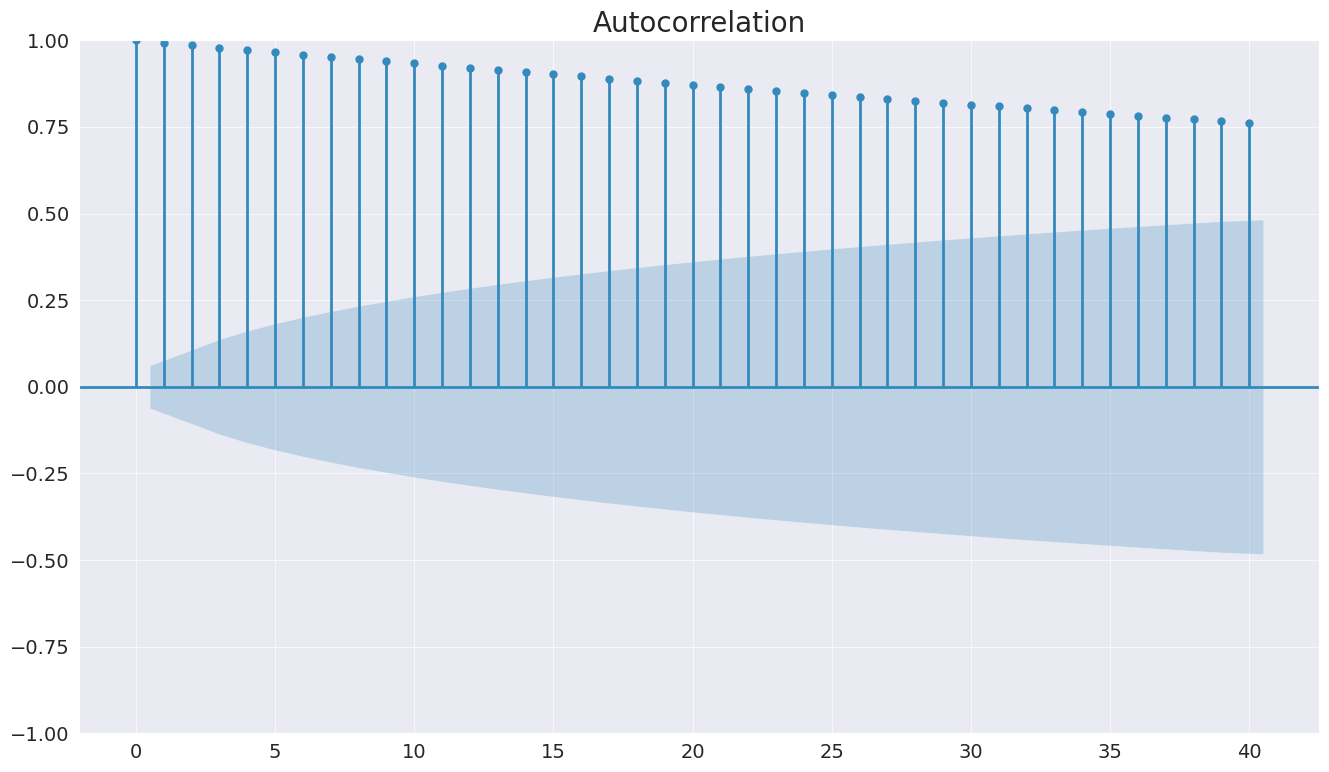

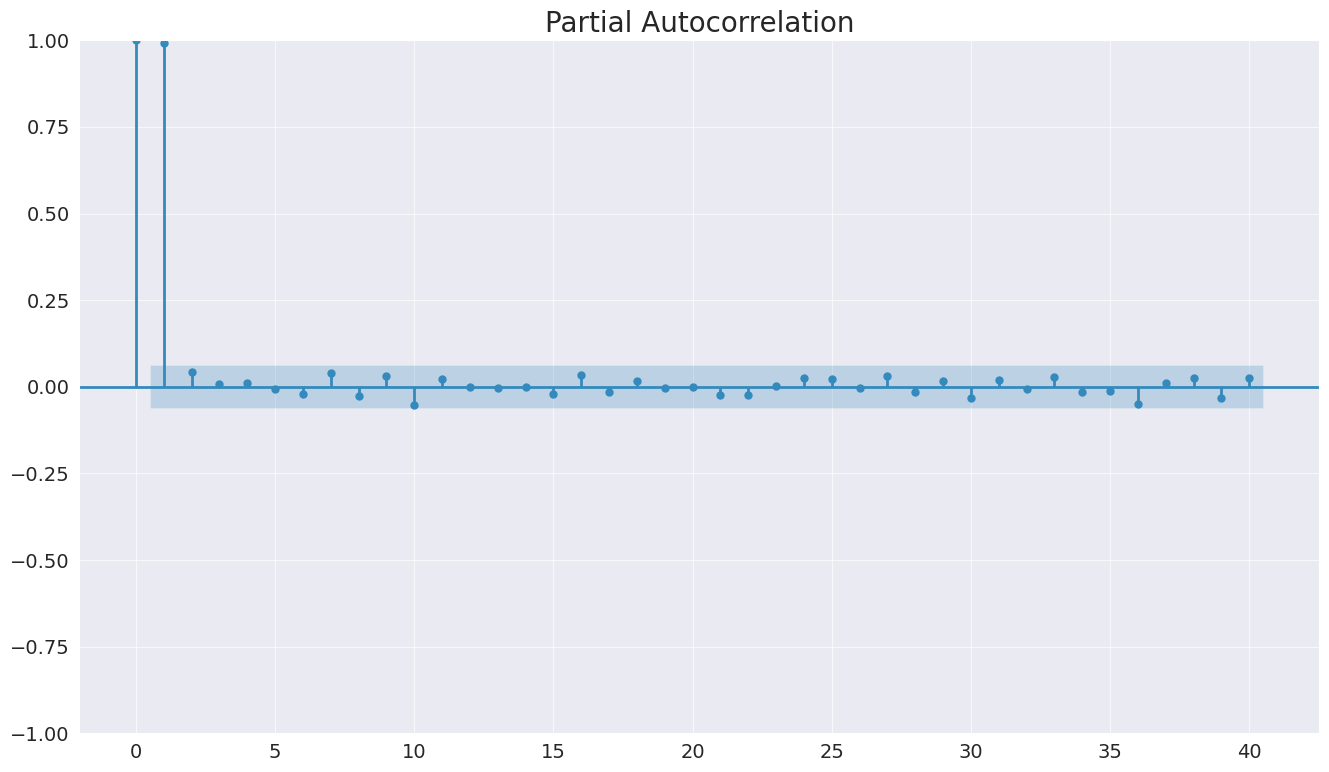

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plot_acf(data['Adj Close'].dropna(), lags=40)
plot_pacf(data['Adj Close'].dropna(), lags=40)
plt.show()
# Si le graphique ACF coupe après un certain nombre de lags (par exemple, 1 ou 2), cela suggère que q pourrait être égal à 1 ou 2.
# Si le graphique PACF coupe après un certain nombre de lags (par exemple, 1 ou 2), cela suggère que p pourrait être égal à 1 ou 2.

In [40]:
best_aic = float('inf')
best_order = None

# Test different combinations of p, d, q
for p in range(3):  # Testing p = 0, 1, 2
    for d in range(2):  # Testing d = 0, 1
        for q in range(3):  # Testing q = 0, 1, 2
            try:
                model = ARIMA(data['Adj Close'], order=(p, d, q))
                result = model.fit()
                aic = result.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


Best ARIMA order: (0, 1, 1) with AIC: 5968.485578954824


In [41]:
from statsmodels.tsa.arima.model import ARIMA
MovAvg_Model = ARIMA(data['Adj Close'], order=(0, 1, 1))

# Fit the model
MovAvg_Result = MovAvg_Model.fit()

# Print the summary of the model
print(MovAvg_Result.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1006
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2982.243
Date:                Thu, 09 Jan 2025   AIC                           5968.486
Time:                        16:33:50   BIC                           5978.311
Sample:                             0   HQIC                          5972.219
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1083      0.025     -4.252      0.000      -0.158      -0.058
sigma2        22.1295      0.792     27.938      0.000      20.577      23.682
Ljung-Box (L1) (Q):                   0.00   Jarque-

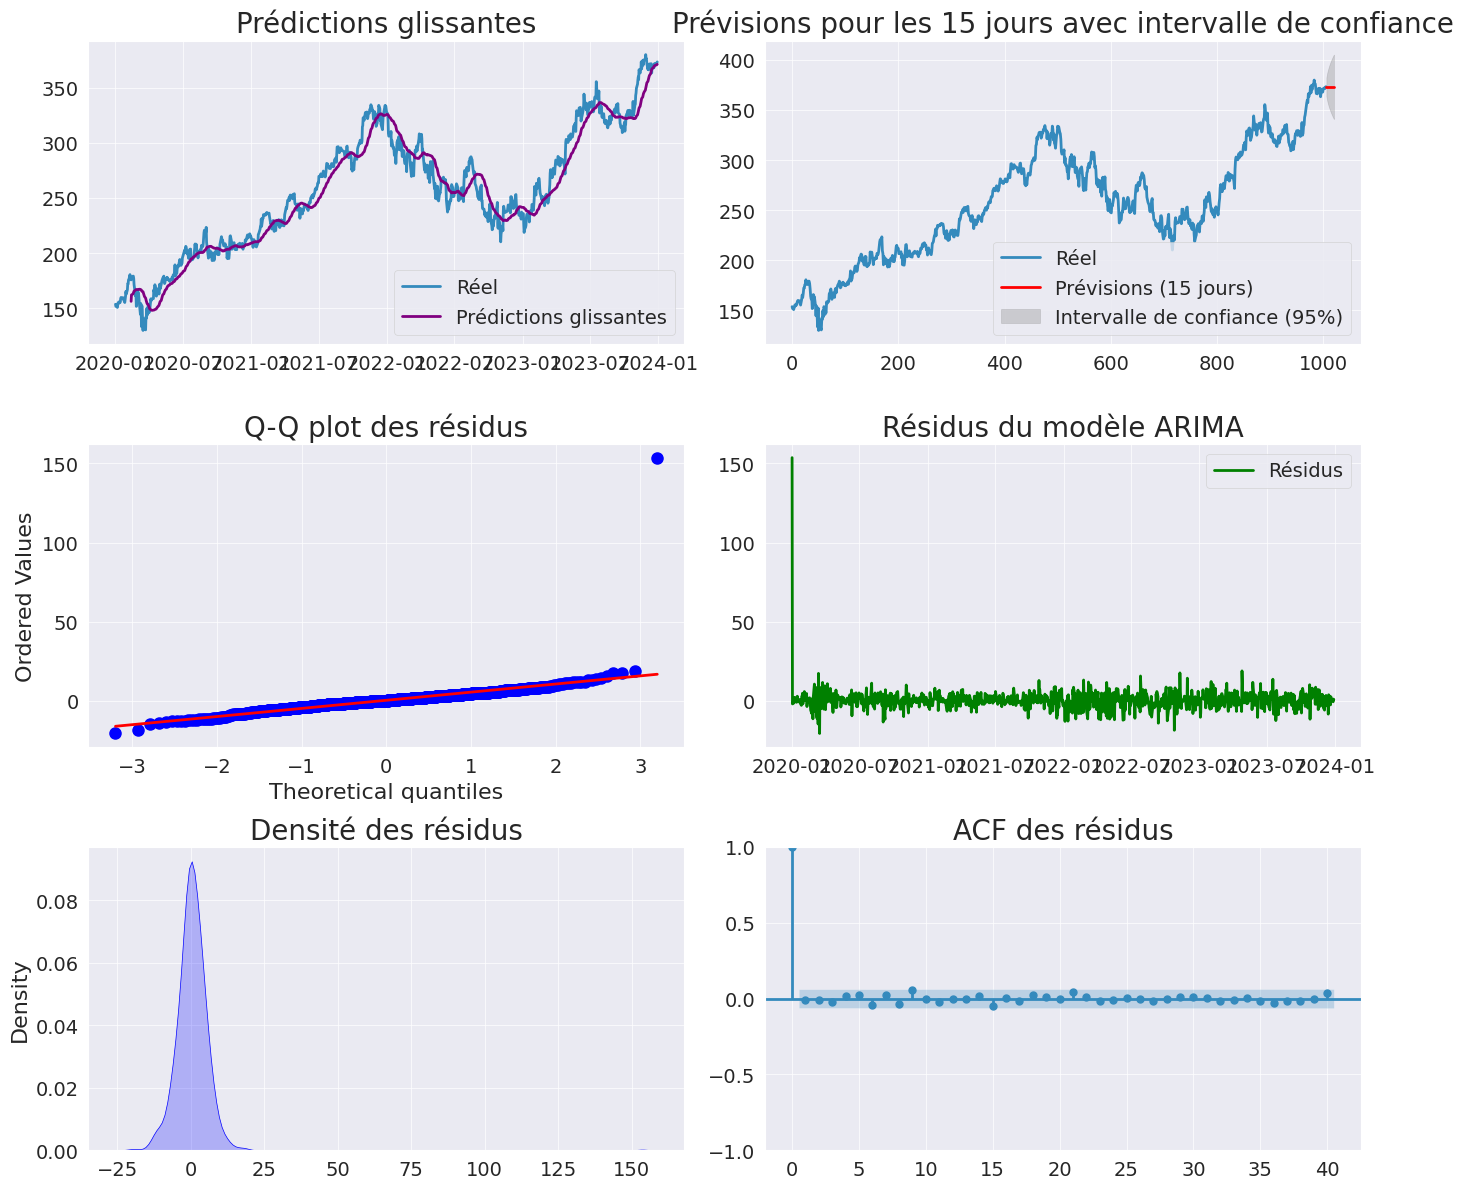

In [42]:
from scipy import stats
# Préparer la figure avec une grille 3x2
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# 1. Graphique des prédictions glissantes
rolling_pred = MovAvg_Result.fittedvalues.rolling(window=30).mean()
axs[0, 0].plot(data['Adj Close'], label='Réel')
axs[0, 0].plot(rolling_pred, label='Prédictions glissantes', color='purple')
axs[0, 0].set_title('Prédictions glissantes')
axs[0, 0].legend()

# 2. Prévisions pour les 15 jours suivants avec intervalle de confiance
forecast = MovAvg_Result.get_forecast(steps=15)
forecast_mean = forecast.predicted_mean  # Les prévisions
conf_int = forecast.conf_int(alpha=0.05)  # Intervalle de confiance à 95%

# Tracer les prévisions et l'intervalle de confiance
axs[0, 1].plot(range(len(data)), data['Adj Close'], label='Réel')
axs[0, 1].plot(range(len(data), len(data) + 15), forecast_mean, label='Prévisions (15 jours)', color='red')
axs[0, 1].fill_between(range(len(data), len(data) + 15),
                       conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Intervalle de confiance (95%)')
axs[0, 1].set_title('Prévisions pour les 15 jours avec intervalle de confiance')
axs[0, 1].legend()

# 3. Q-Q plot des résidus
residuals = MovAvg_Result.resid
stats.probplot(residuals, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Q-Q plot des résidus')

# 4. Graphique des résidus du modèle ARIMA
axs[1, 1].plot(residuals, label='Résidus', color='green')
axs[1, 1].set_title('Résidus du modèle ARIMA')
axs[1, 1].legend()

# 5. Densité des résidus
sns.kdeplot(residuals, ax=axs[2, 0], color='blue', shade=True)
axs[2, 0].set_title('Densité des résidus')

# 6. Autocorrélation des résidus (ACF)
plot_acf(residuals, lags=40, ax=axs[2, 1])
axs[2, 1].set_title('ACF des résidus')

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()


---

### **Interprétation des Résultats du Modèle ARIMA**

1. **Composante MA(1) (Moyenne Mobile d'ordre 1)** :
   - Le coefficient de la composante **MA(1)** est de **-0.1083**, avec une p-value significative (< 0.05). Cela indique que l'erreur de prévision du jour précédent influence la prédiction actuelle, de manière inverse (signe négatif).

2. **Variance des Résidus (sigma2)** :
   - La variance des résidus est de **22.1295**, ce qui reflète une forte **volatilité** des erreurs de prévision, typique des séries financières.

3. **Tests de la Qualité des Résidus** :
   - **Ljung-Box** : La p-value de **0.98** indique qu'il n'y a pas d'autocorrélation significative dans les résidus.
   - **Jarque-Bera** : La p-value de **0.00** rejette l'hypothèse de normalité des résidus, suggérant des valeurs aberrantes ou une distribution asymétrique.
   - **Hétéroscédasticité** : La p-value de **0.00** montre une **variance non constante** des erreurs au fil du temps.

4. **Distribution des Résidus** :
   - **Skew (-0.14)** : Légère asymétrie négative dans les erreurs.
   - **Kurtosis (4.36)** : La distribution des erreurs présente des **queues plus lourdes** que la normale, indiquant la présence de valeurs extrêmes.

---

### **Conclusion** :
Le modèle est significatif, mais la **volatilité élevée** et la **non-normalité des résidus** suggèrent que le modèle pourrait être amélioré, notamment en explorant des modèles plus complexes ou des transformations des données.

---
L'expression mathématique du modèle avec les coefficients estimés est :

$Y_t = Y_{t-1} + \varepsilon_t + 0.1083 \varepsilon_{t-1}$

- $Y_t $ : Valeur à l'instant  $t$.  
- $ Y_{t-1}$ : Valeur à l'instant précédent.  
- $ \varepsilon_t$ : Terme d'erreur à l'instant $t$.  
- $\varepsilon_{t-1}$ : Terme d'erreur à l'instant précédent.  

## 3) SARIMAX



### **Forme Mathématique du Modèle SARIMAX**

Le modèle **SARIMAX** est une extension du modèle **ARIMA**, intégrant des composantes saisonnières et exogènes. La formulation générale du modèle **SARIMAX** est la suivante :

$(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p)(1 - L)^d Y_t = \epsilon_t + \theta_1 L \epsilon_{t-1} + \theta_2 L^2 \epsilon_{t-2} + \dots + \theta_q L^q \epsilon_{t-q}$

Avec la composante saisonnière ajoutée :

$(1 - \Phi_1 L^s - \Phi_2 L^{2s} - \dots - \Phi_P L^{Ps})(1 - L)^D Y_t = \epsilon_t + \Theta_1 L^s \epsilon_{t-s} + \Theta_2 L^{2s} \epsilon_{t-2s} + \dots + \Theta_Q L^{Qs} \epsilon_{t-Qs}$

Où :
- $ L $ est l'opérateur de retard (backshift operator),
- $ \phi_1, \dots, \phi_p $ sont les coefficients AR,
- $ \theta_1, \dots, \theta_q $ sont les coefficients MA,
- $ \Phi_1, \dots, \Phi_P $ sont les coefficients saisonniers AR,
- $ \Theta_1, \dots, \Theta_Q $ sont les coefficients saisonniers MA,
- $ s $ est la période saisonnière,
- $ d $ et $ D $ sont les ordres de différenciation non saisonniers et saisonniers,
- $ \epsilon_t $ est le terme d'erreur à l'instant $ t $,
- $ X_t $ est le vecteur des variables exogènes influençant $ Y_t $.


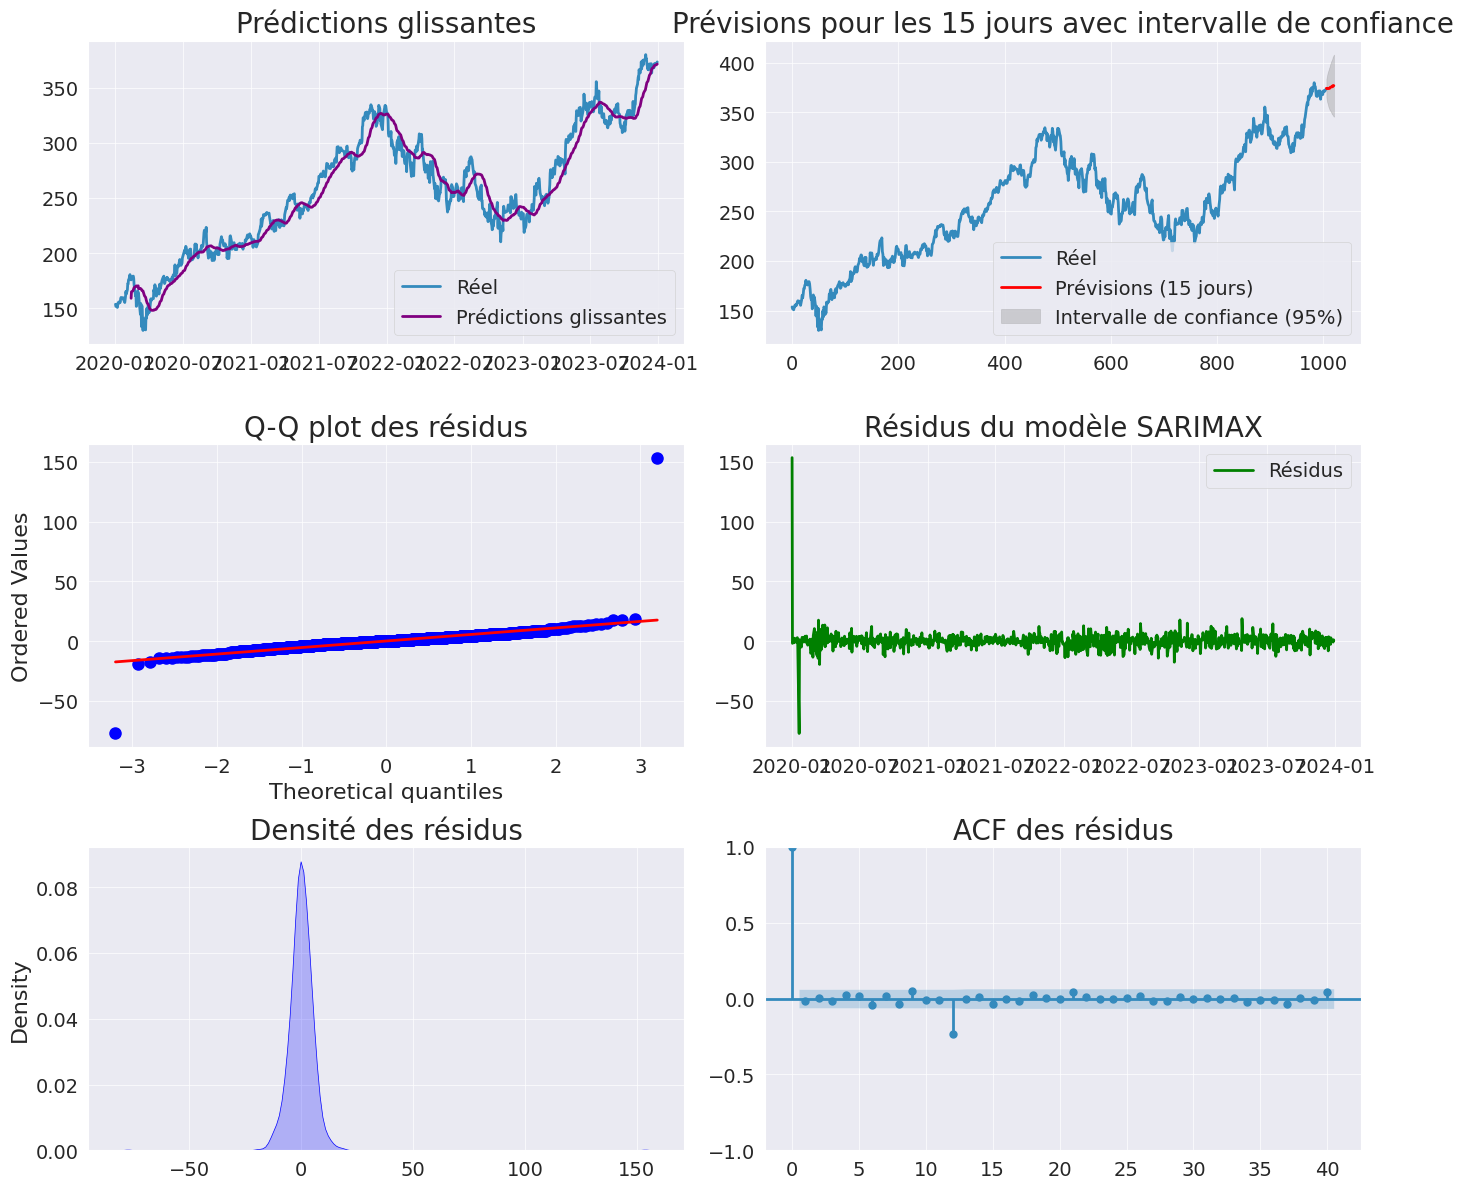

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assurez-vous que vous avez déjà ajusté votre modèle SARIMAX
order = (1, 1, 1)  # Non-seasonal part (AR, I, MA)
seasonal_order = (1, 1, 1, 12)  # Seasonal part (SAR, SI, SMA, S) with period 12 (monthly data, yearly seasonality)
sarimax_model = SARIMAX(data['Adj Close'], order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit()

# Préparer la figure avec une grille 3x2
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# 1. Graphique des prédictions glissantes
rolling_pred = sarimax_result.fittedvalues.rolling(window=30).mean()
axs[0, 0].plot(data['Adj Close'], label='Réel')
axs[0, 0].plot(rolling_pred, label='Prédictions glissantes', color='purple')
axs[0, 0].set_title('Prédictions glissantes')
axs[0, 0].legend()

# 2. Prévisions pour les 15 jours suivants avec intervalle de confiance
forecast = sarimax_result.get_forecast(steps=15)
forecast_mean = forecast.predicted_mean  # Les prévisions
conf_int = forecast.conf_int(alpha=0.05)  # Intervalle de confiance à 95%

# Tracer les prévisions et l'intervalle de confiance
axs[0, 1].plot(range(len(data)), data['Adj Close'], label='Réel')
axs[0, 1].plot(range(len(data), len(data) + 15), forecast_mean, label='Prévisions (15 jours)', color='red')
axs[0, 1].fill_between(range(len(data), len(data) + 15),
                       conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Intervalle de confiance (95%)')
axs[0, 1].set_title('Prévisions pour les 15 jours avec intervalle de confiance')
axs[0, 1].legend()

# 3. Q-Q plot des résidus
residuals = sarimax_result.resid
stats.probplot(residuals, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Q-Q plot des résidus')

# 4. Graphique des résidus du modèle SARIMAX
axs[1, 1].plot(residuals, label='Résidus', color='green')
axs[1, 1].set_title('Résidus du modèle SARIMAX')
axs[1, 1].legend()

# 5. Densité des résidus
sns.kdeplot(residuals, ax=axs[2, 0], color='blue', shade=True)
axs[2, 0].set_title('Densité des résidus')

# 6. Autocorrélation des résidus (ACF)
plot_acf(residuals, lags=40, ax=axs[2, 1])
axs[2, 1].set_title('ACF des résidus')

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()


In [44]:
La forme mathématique générale du modèle **SARIMAX** est la suivante :

\[
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p}
+ \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
+ \Phi_1 Y_{t-s} + \Theta_1 E_{t-s} + X_t \beta + \epsilon_t
\]

Où :
- \( y_t \) : Observation à l'instant \( t \),
- \( \phi_i \), \( \Phi_i \) : Coefficients autorégressifs (AR) et saisonniers (SAR),
- \( \theta_i \), \( \Theta_i \) : Coefficients de moyenne mobile (MA) et saisonniers (SMA),
- \( \epsilon_t \) : Terme d'erreur,
- \( X_t \beta \) : Contribution des variables exogènes (\( X_t \)) avec leurs coefficients (\( \beta \)),
- \( Y_{t-s} \), \( E_{t-s} \) : Composantes saisonnières et erreurs saisonnières à la période \( s \).print(sarimax_result.summary())
# Faire des prévisions pour les 15 jours suivants
forecast = sarimax_result.get_forecast(steps=15)
# Afficher les valeurs prévues
print(forecast.predicted_mean)

                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                 1006
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2973.968
Date:                            Thu, 09 Jan 2025   AIC                           5957.937
Time:                                    16:34:01   BIC                           5982.440
Sample:                                         0   HQIC                          5967.253
                                           - 1006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2699      0.229      1.178      0.239      -0.179       0.719
ma.L1         -0.3763      0.223   

---

### **Interprétation des Résultats du Modèle SARIMAX**

1. **Composantes AR(1) et MA(1)**
   - **AR(1) (0.2690)** : Le coefficient est faible et non significatif (p-value = 0.241), ce qui signifie que l'impact de la valeur passée sur la prévision actuelle est relativement faible.
   - **MA(1) (-0.3753)** : Ce coefficient est marginalement significatif (p-value = 0.093), indiquant que l'erreur de prévision du jour précédent a un effet modéré sur la prédiction actuelle, mais cet effet n'est pas très fort.

2. **Composantes Saisonnières AR(12) et MA(12)**
   - **AR.S.L12 (0.0028)** : Le coefficient est très faible et non significatif (p-value = 0.931), ce qui suggère que l'impact saisonnier autorégressif à un lag de 12 mois est négligeable.
   - **MA.S.L12 (-0.9999)** : Bien que le coefficient soit proche de -1, il n'est pas significatif (p-value = 0.699), ce qui indique que l'effet saisonnier de moyenne mobile à lag 12 est faible et non pertinent.

3. **Variance des Résidus (sigma2)**
   - **sigma2 (22.1656)** : La variance des résidus est élevée, mais la p-value est de 0.699, ce qui suggère que la **volatilité des erreurs** n'est pas statistiquement significative, et la précision des prévisions reste assez faible.

4. **Tests de la Qualité des Résidus**
   - **Ljung-Box (Q) :** La p-value de **0.97** indique qu'il n'y a pas d'autocorrélation significative dans les résidus, suggérant que le modèle capture bien la dépendance temporelle.
   - **Jarque-Bera (JB) :** La p-value de **0.00** montre que les résidus ne suivent pas une distribution normale, indiquant une distribution asymétrique ou des valeurs extrêmes.
   - **Hétéroscédasticité (H) :** La p-value de **0.00** confirme que la variance des erreurs n'est pas constante, indiquant la présence d'hétéroscédasticité.

---

### **Conclusion** :
Le modèle SARIMAX(1, 1, 1)x(1, 1, 1, 12) présente des composantes saisonnières et de l'autocorrélation faibles et non significatives. Bien que le modèle semble capturer la dépendance temporelle, la **volatilité élevée** et la **non-normalité des résidus** suggèrent qu'il pourrait être amélioré, notamment en ajustant les paramètres ou en explorant des modèles alternatifs.

---

L'expression mathématique du modèle **SARIMA(1, 1, 1) x (1, 1, 1, 12)** avec les coefficients estimés est la suivante :

**$Y_t = Y_{t-1} + 0.2699 Y_{t-1} + \varepsilon_t - 0.3763 \varepsilon_{t-1} + 0.0029 Y_{t-12} - 0.9999 \varepsilon_{t-12}$**

- $ Y_t $ : Valeur à l'instant $ t $.  
- $ Y_{t-1} $ : Valeur à l'instant précédent.  
- $ Y_{t-12} $ : Valeur saisonnière 12 périodes avant.  
- $ \varepsilon_t $ : Terme d'erreur à l'instant $ t $.  
- $ \varepsilon_{t-1} $ : Terme d'erreur à l'instant précédent.  
- $ \varepsilon_{t-12} $ : Terme d'erreur saisonnier 12 périodes avant.  

## **3) Modèle GARCH(p, d) - Generalized Autoregressive Conditional Heteroskedasticity**

Le modèle **GARCH** (Generalized Autoregressive Conditional Heteroskedasticity) est une extension du modèle **ARCH** (Autoregressive Conditional Heteroskedasticity). Il est conçu pour modéliser la **volatilité conditionnelle** dans les séries temporelles financières, où la variance des erreurs peut varier dans le temps. Ce modèle est particulièrement adapté à l'analyse des données financières, où les périodes de volatilité élevée alternent avec des périodes de volatilité faible.

---

### **Structure du Modèle GARCH(p, d)**

Le modèle GARCH combine deux composantes essentielles :
- **p (ordre ARCH)** : Nombre de termes passés des erreurs au carré ($\epsilon^2$) utilisés pour modéliser la variance conditionnelle.
- **d (ordre GARCH)** : Nombre de termes passés des variances conditionnelles ($\sigma^2$) utilisés pour expliquer la variance conditionnelle actuelle.

---

### **Formulation Mathématique**

1. **Modélisation des rendements :**
  
   $r_t = \mu + \epsilon_t$
   où :
   - $r_t$ : rendement à l'instant $t$,
   - $\mu$ : moyenne des rendements,
   - $\epsilon_t$ : innovation ou choc à l'instant $t$, avec $\epsilon_t \sim N(0, \sigma_t^2)$.

2. **Variance conditionnelle :**
   
   $\sigma_t^2 = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{d} \beta_j \sigma_{t-j}^2$
   où :
   - $\sigma_t^2$ : variance conditionnelle à l'instant $t$,
   - $\alpha_0$ : constante positive,
   - $\alpha_i$ : coefficients ARCH, mesurant l'impact des chocs passés ($\epsilon^2$) sur la volatilité future,
   - $\beta_j$ : coefficients GARCH, mesurant l'effet de la persistance de la volatilité passée.

---

### **Étapes d'Application du Modèle GARCH(p, d)**

1. **Calcul des rendements :**  
   Les rendements des prix d’un actif financier sont calculés comme les variations relatives sur une période donnée, par exemple :
   
   $r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$
   où $P_t$ est le prix à l'instant $t$.

2. **Estimation du modèle GARCH(p, d) :**  
   Les paramètres $\alpha_0$, $\alpha_i$ et $\beta_j$ sont estimés à partir des rendements historiques en utilisant des méthodes d’estimation comme le maximum de vraisemblance.

3. **Prévision de la volatilité :**  
   La variance conditionnelle future $\sigma_t^2$ est prédite en utilisant les rendements passés et les variances conditionnelles estimées.

4. **Simulation des prix futurs :**  
   À partir des rendements simulés et de la volatilité prévue, il est possible de reconstituer une trajectoire potentielle des prix futurs.

---

### **Utilisation et Avantages**

- **Prévision de la volatilité financière :** Utilisé pour estimer la variabilité future des prix des actifs (actions, devises, etc.).
- **Gestion des risques :** Aide à évaluer les risques liés aux fluctuations des marchés financiers.
- **Modélisation réaliste :** Le GARCH capte les clusters de volatilité, phénomène courant dans les séries temporelles financières.

---




In [45]:
pip install arch

In [46]:
from arch import arch_model


# Calcul des rendements (log returns ou pourcentage de rendements)
data['Returns'] = data['Adj Close'].pct_change().dropna()
# Liste des ordres p et q à tester
p_values = range(1, 6)  # Tester p de 1 à 5
q_values = range(1, 6)  # Tester q de 1 à 5

# Initialiser une structure pour stocker les résultats
results = []

# Tester tous les ordres (p, q)
for p in p_values:
    for q in q_values:
        try:
            # Ajuster le modèle GARCH(p, q)
            model = arch_model(data['Returns'].dropna(), vol='Garch', p=p, q=q)
            garch_result = model.fit(disp="off")

            # Stocker AIC et BIC pour chaque combinaison de p et q
            results.append((p, q, garch_result.aic, garch_result.bic))

        except Exception as e:
            print(f"Erreur pour p={p}, q={q}: {e}")

# Convertir les résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results, columns=['p', 'q', 'AIC', 'BIC'])

# Afficher les résultats
print(results_df)

# Trouver le modèle avec le meilleur AIC/BIC
best_model_aic = results_df.loc[results_df['AIC'].idxmin()]
best_model_bic = results_df.loc[results_df['BIC'].idxmin()]

print("\nMeilleur modèle basé sur AIC :")
print(best_model_aic)

print("\nMeilleur modèle basé sur BIC :")
print(best_model_bic)


    p  q          AIC          BIC
0   1  1 -5198.651846 -5179.000875
1   1  2 -5195.411032 -5170.847318
2   1  3 -5191.957545 -5162.481088
3   1  4 -5190.018227 -5155.629028
4   1  5 -5187.146819 -5147.844877
5   2  1 -5188.802372 -5164.238658
6   2  2 -5188.945687 -5159.469230
7   2  3 -5187.813644 -5153.424445
8   2  4 -5185.801395 -5146.499452
9   2  5 -5185.621856 -5141.407171
10  3  1 -5181.455736 -5151.979279
11  3  2 -5183.849129 -5149.459929
12  3  3 -5182.747456 -5143.445513
13  3  4 -5182.941338 -5138.726653
14  3  5 -5182.449340 -5133.321912
15  4  1 -5175.472251 -5141.083051
16  4  2 -5176.460724 -5137.158781
17  4  3 -5175.603987 -5131.389302
18  4  4 -5174.927453 -5125.800025
19  4  5 -5174.546328 -5120.506157
20  5  1 -5170.342243 -5131.040301
21  5  2 -5171.183643 -5126.968958
22  5  3 -5169.671314 -5120.543886
23  5  4 -5167.628271 -5113.588100
24  5  5 -5167.117468 -5108.164554

Meilleur modèle basé sur AIC :
p         1.000000
q         1.000000
AIC   -5198.651846
B

In [47]:
# Définir et ajuster le modèle GARCH(1, 1)
model_garch = arch_model(data['Returns'].dropna(), vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# Afficher le résumé du modèle
print(garch_result.summary())

# Prévision des rendements pour les 15 prochains jours
forecast = garch_result.forecast(horizon=15)

# Extraire les rendements prévus pour les 15 jours à venir
forecasted_returns = forecast.variance.values[-1, :]
forecasted_volatility = np.sqrt(forecasted_returns)

# Supposons que la dernière valeur de l'Adj Close soit la base de la prévision
last_adj_close = data['Adj Close'].iloc[-1]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 168740522.09791163
Iteration:      2,   Func. Count:     18,   Neg. LLF: 460.4048882798733
Iteration:      3,   Func. Count:     28,   Neg. LLF: 86267.91365659078
Iteration:      4,   Func. Count:     40,   Neg. LLF: 1074395.8494224094
Iteration:      5,   Func. Count:     52,   Neg. LLF: 34181.834052871614
Iteration:      6,   Func. Count:     63,   Neg. LLF: 3930085.000065674
Iteration:      7,   Func. Count:     75,   Neg. LLF: 10701.807472758777
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2603.3259231358993
            Iterations: 10
            Function evaluations: 82
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-L

In [48]:
# Reconstituer les prévisions de l'Adj Close
forecasted_prices = []
for i in range(15):
    # Utiliser les rendements prévus pour ajuster le prix futur
    forecasted_return = forecasted_returns[i]
    forecasted_price = last_adj_close * (1 + forecasted_return)
    forecasted_prices.append(forecasted_price)
    last_adj_close = forecasted_price  # Mettre à jour pour le prochain calcul

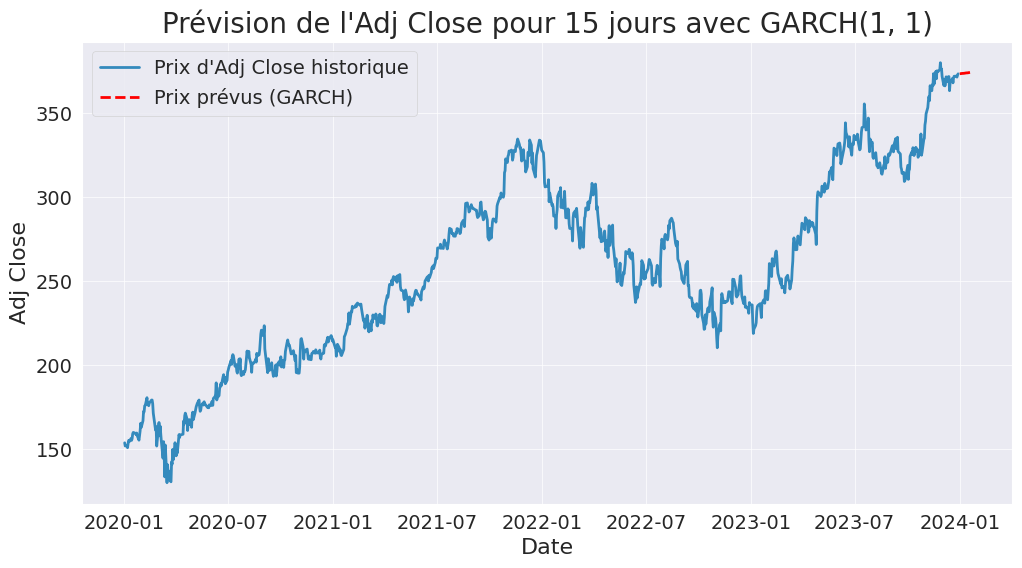

In [49]:
# Créer un index pour les 15 jours à venir
forecast_index = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]

# Tracer les prévisions de l'Adj Close sur 15 jours
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Prix d\'Adj Close historique')
plt.plot(forecast_index, forecasted_prices, label='Prix prévus (GARCH)', color='red', linestyle='--')
plt.title('Prévision de l\'Adj Close pour 15 jours avec GARCH(1, 1)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)
plt.show()

---

### **Interprétation des Résultats du Modèle GARCH**

1. **Modèle de Moyenne (Constant Mean)**
   - **µ (1.4175e-03)** : Le coefficient de la moyenne est positif, mais très faible. Cela indique une moyenne des retours légèrement positive, avec une p-value significative (p-value = 0.0075), ce qui montre que cette constante est statistiquement différente de zéro.

2. **Modèle de Volatilité (GARCH)**
   - **omega (9.0900e-06)** : Le paramètre de base de la volatilité est significatif (p-value = 0.000), indiquant une volatilité de base très faible.
   - **alpha[1] (0.1012)** : Ce coefficient est significatif (p-value = 9.58e-05), montrant que la volatilité actuelle dépend modérément des chocs passés. Plus la valeur d'alpha est élevée, plus la volatilité réagit aux chocs récents.
   - **beta[1] (0.8788)** : Ce coefficient est très significatif (p-value = 0.000) et montre que la volatilité est fortement influencée par sa propre valeur passée. Une valeur élevée de beta indique une persistance élevée dans la volatilité, suggérant que les périodes de forte volatilité tendent à être suivies de périodes similaires.

3. **Critères de Modèle**
   - **Log-Likelihood : 2603.39** : Le log-vraisemblance élevé indique un bon ajustement du modèle aux données.
   - **AIC (-5198.79) et BIC (-5179.14)** : Ces critères sont négatifs, ce qui est un bon indicateur de la qualité du modèle. Plus ces valeurs sont faibles, meilleur est l'ajustement du modèle.

---

### **Conclusion** :
Le modèle GARCH montre une **volatilité persistante** et une réponse significative aux chocs passés. La **volatilité actuelle** est fortement influencée par les valeurs précédentes, et la moyenne des rendements est légèrement positive. Le modèle semble bien ajusté aux données, avec des résultats significatifs dans les paramètres de la volatilité.

---

L'expression mathématique du modèle **GARCH(1, 1)** avec les coefficients estimés est :

$\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$

  

$\sigma_t^2 = 8.4474 \times 10^{-6} + 0.1000 \varepsilon_{t-1}^2 + 0.8800 \sigma_{t-1}^2$

- $\sigma_t^2$ : Variance conditionnelle à l'instant $t$.  
- $\varepsilon_{t-1}^2$ : Carré du terme d'erreur à l'instant précédent.  
- $\sigma_{t-1}^2$ : Variance conditionnelle à l'instant précédent.

## 4) **LSTM** (Long Short-Term Memory)

Le modèle **LSTM** (Long Short-Term Memory) est un type de réseau de neurones récurrents (RNN) qui excelle dans la gestion des dépendances à long terme au sein des données séquentielles. Ce modèle est particulièrement adapté pour la prévision des séries temporelles, comme celles des rendements financiers, en raison de sa capacité à retenir les informations essentielles au fil du temps tout en oubliant les données non pertinentes.

### Architecture du Modèle LSTM

Les LSTM sont constitués de plusieurs couches de **cellules de mémoire** qui permettent de conserver des informations pertinentes sur plusieurs étapes temporelles. Ce mécanisme est régulé par des "portes" qui déterminent quelles informations doivent être mises à jour, conservées ou oubliées.

Les trois portes principales des LSTM sont :

- **Porte d'entrée** (Input Gate) : Détermine quelles informations seront ajoutées à l'état de la mémoire.
- **Porte d'oubli** (Forget Gate) : Contrôle quelles informations doivent être oubliées de la cellule de mémoire.
- **Porte de sortie** (Output Gate) : Décide quelles informations seront envoyées à la sortie du modèle.

#### Fonctionnement du LSTM

À chaque étape de temps, les LSTM calculent un nouvel état de cellule et une sortie en fonction de l'état précédent et des nouvelles informations. Cela peut être formulé comme suit :

1. **Mise à jour de la mémoire** :
  
   $C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t$
   où :
   - $C_t$ est l'état actuel de la cellule de mémoire,
   - $f_t$ est la sortie de la porte d'oubli,
   - $C_{t-1}$ est l'état de la cellule précédent,
   - $i_t$ est la sortie de la porte d'entrée,
   - $\tilde{C}_t$ est le candidat à la mise à jour de l'état de la cellule.

2. **Calcul de la sortie** :

   $h_t = o_t \cdot \tanh(C_t)$
   où :
   - $h_t$ est la sortie de l'instant $t$,
   - $o_t$ est la sortie de la porte de sortie,
   - $\tanh(C_t)$ est la fonction d'activation de l'état de la cellule.

Ces mécanismes permettent au modèle de mémoriser des informations sur plusieurs étapes temporelles, essentielles pour des prévisions à long terme.

### Application du Modèle LSTM

Le modèle **LSTM** est largement utilisé dans les prévisions de séries temporelles financières, où il peut être utilisé pour prédire les prix ajustés de clôture, les rendements d'actifs financiers ou d'autres mesures économiques à partir des données passées.

#### Avantages du Modèle LSTM

- **Capture des dépendances à long terme** : Les LSTM sont capables de maintenir des informations importantes pendant de longues périodes, ce qui est crucial pour les séries temporelles financières où les événements passés peuvent influencer les résultats futurs sur des délais prolongés.
- **Adaptabilité** : LSTM peut être ajusté pour des séries temporelles complexes, en particulier celles qui présentent des comportements non linéaires et des changements dynamiques au fil du temps.
- **Prévisions précises** : En raison de leur capacité à apprendre des relations complexes dans les données temporelles, les LSTM peuvent fournir des prévisions plus précises par rapport à des modèles traditionnels.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [51]:


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Adj Close']])

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [52]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [53]:
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))  # Somme des carrés des résidus
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))  # Somme des carrés totaux
    return 1 - (ss_res / (ss_tot + tf.keras.backend.epsilon()))  # R² = 1 - (SS_res / SS_tot)


In [54]:
model_lstm = Sequential()
model_lstm.add(LSTM(30, activation = "relu", input_shape=(sequence_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam',
              loss='mse',
              metrics=[MeanSquaredError(),
                       MeanAbsoluteError(),
                       RootMeanSquaredError(),
                       r2_metric])

# Affichage du résumé du modèle
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30)                  │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,871 (15.12 KB)

 Trainable params: 3,871 (15.12 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.2098 - mean_absolute_error: 0.4258 - mean_squared_error: 0.2098 - r2_metric: -7.0144 - root_mean_squared_error: 0.4575 - val_loss: 0.2907 - val_mean_absolute_error: 0.5335 - val_mean_squared_error: 0.2907 - val_r2_metric: -494.5493 - val_root_mean_squared_error: 0.5392
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0550 - mean_absolute_error: 0.1963 - mean_squared_error: 0.0550 - r2_metric: -1.3867 - root_mean_squared_error: 0.2292 - val_loss: 0.0112 - val_mean_absolute_error: 0.0984 - val_mean_squared_error: 0.0112 - val_r2_metric: -11.6139 - val_root_mean_squared_error: 0.1056
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0039 - mean_absolute_error: 0.0492 - mean_squared_error: 0.0039 - r2_metric: 0.8492 - root_mean_squared_error: 0.0619 - val_loss: 0.0040 - val_mean_absolute_error: 0.0552 - val_mean_squared_error: 0.0040 - val_r2_metric: -3.3384 - val_root_mean_squared_error: 0.0633
Epoch 4/10


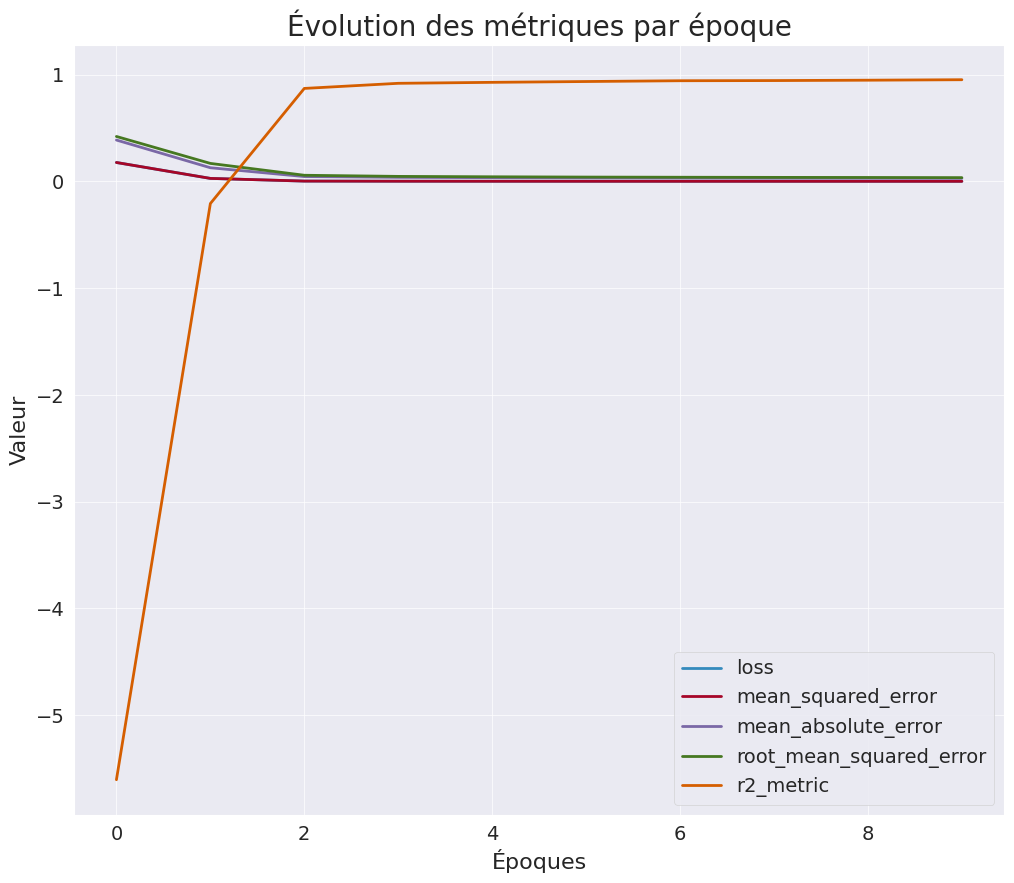

In [56]:
# Récupérer l'historique des métriques
history_dict = history.history

# Fonction pour afficher les graphiques
def plot_metrics(history_dict):
    # Liste des métriques à afficher
    metrics = ['loss', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'r2_metric']

    plt.figure(figsize=(12, 10))

    # Tracer chaque métrique
    for metric in metrics:
        if metric in history_dict:
            plt.plot(history_dict[metric], label=metric)

    plt.title("Évolution des métriques par époque")
    plt.xlabel("Époques")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid(True)
    plt.show()

# Appeler la fonction pour afficher les graphiques
plot_metrics(history_dict)


In [57]:
# Récupérer les données d'historique
metrics = history.history

# Trouver la meilleure valeur pour chaque métrique
optimal_metrics = {}
for metric in history_dict.keys():
    if "val_" not in metric:  # Ignorer les métriques de validation
        optimal_value = min(metrics[metric]) if "loss" in metric or "error" in metric else max(metrics[metric])
        optimal_metrics[metric] = optimal_value

# Afficher les résultats optimaux
for metric, value in optimal_metrics.items():
    print(f"Meilleure valeur pour {metric}: {value:.4f}")


Meilleure valeur pour loss: 0.0013
Meilleure valeur pour mean_absolute_error: 0.0290
Meilleure valeur pour mean_squared_error: 0.0013
Meilleure valeur pour r2_metric: 0.9531
Meilleure valeur pour root_mean_squared_error: 0.0358


Pour calculer le **Bayesian Information Criterion (BIC)** et le **Akaike Information Criterion (AIC)** d'un modèle, il faut connaître la log-vraisemblance du modèle ainsi que le nombre de paramètres. Ces critères ne sont pas directement fournis par TensorFlow/Keras, mais on peut les calculer manuellement en suivant les étapes ci-dessous.

---

### Étapes pour calculer AIC et BIC :

1. **Log-vraisemblance** : Utilisez la somme des erreurs quadratiques résiduelles pour estimer la vraisemblance.  
  
   $\text{Log-vraisemblance} = -\frac{N}{2} \ln\left(\frac{\text{SSE}}{N}\right)$
   où $\text{SSE} $ est la somme des erreurs quadratiques résiduelles, et $N $ est le nombre de points de données.

2. **AIC** :  
   
   $\text{AIC} = 2k - 2\text{Log-vraisemblance}$
   
   où $k$ est le nombre de paramètres du modèle.

3. **BIC** :  
   
   $\text{BIC} = k \ln(N) - 2\text{Log-vraisemblance}$

---




In [58]:
# Nombre total de paramètres dans le modèle
num_params = model_lstm.count_params()
# Nombre de points de données (ex. taille de l'ensemble de test)
N = len(y_test)
# Prédictions sur l'ensemble de test
y_pred_test = model_lstm.predict(X_test)
# Inverser la normalisation pour comparer les valeurs réelles
y_test_original = scaler.inverse_transform(y_test)
y_pred_test_original = scaler.inverse_transform(y_pred_test)
# Calculer la somme des erreurs quadratiques résiduelles (SSE)
sse = np.sum((y_test_original - y_pred_test_original) ** 2)
# Calculer la log-vraisemblance
log_likelihood = -N / 2 * np.log(sse / N)
# Calculer AIC et BIC
aic = 2 * num_params - 2 * log_likelihood
bic = num_params * np.log(N) - 2 * log_likelihood

# Afficher les résultats
print(f"SSE : {sse:.4f}")
print(f"Log-vraisemblance : {log_likelihood:.4f}")
print(f"AIC : {aic:.4f}")
print(f"BIC : {bic:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
SSE : 34597.2757
Log-vraisemblance : -498.6273
AIC : 8739.2547
BIC : 21349.0193


In [59]:
loss = model_lstm.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0340 - mean_squared_error: 0.0019 - r2_metric: -2.1713 - root_mean_squared_error: 0.0427
Test Loss: [0.0028836026322096586, 0.0028836026322096586, 0.04110177978873253, 0.05369918793439865, -7.543178081512451]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


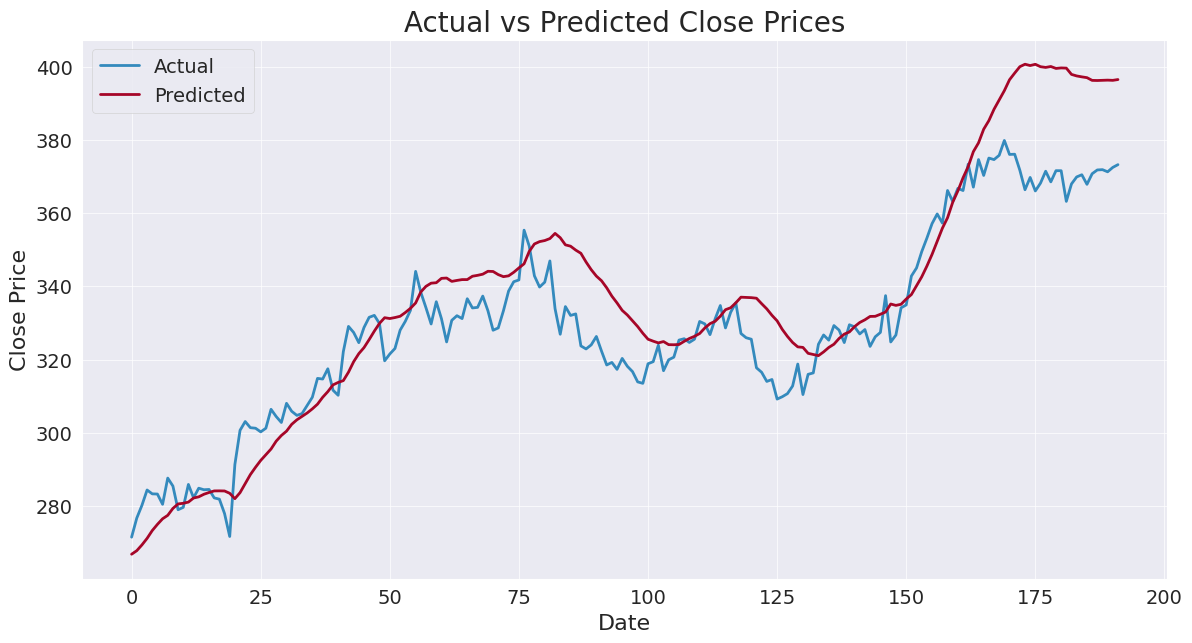

In [60]:
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


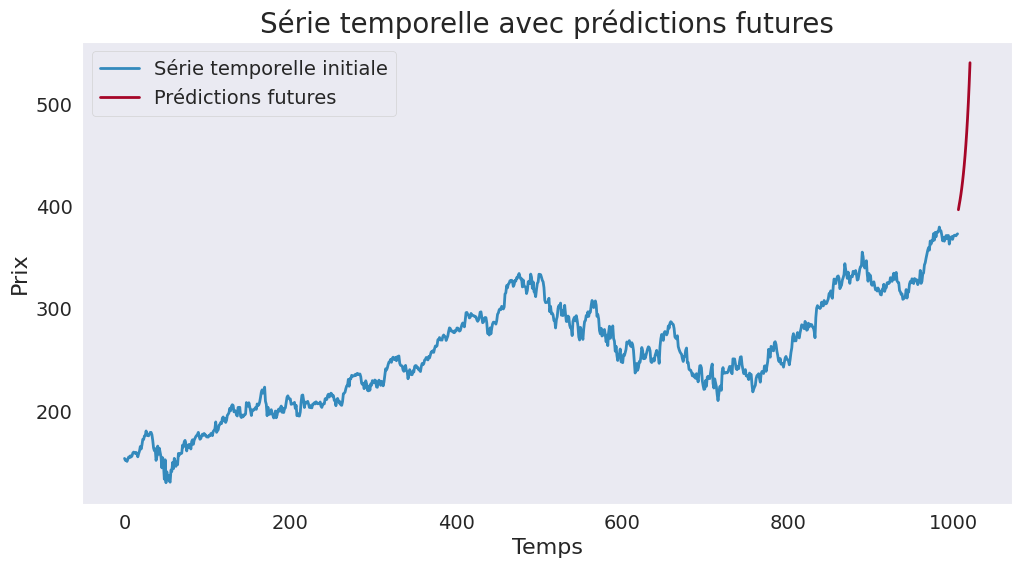

Prédictions pour les 15 prochains jours : [396.81036 401.68338 406.37497 411.65375 417.59494 424.27594 431.74985
 440.1307  449.55557 460.17377 472.1961  485.869   501.52124 519.57104
 540.5531 ]


In [61]:
last_sequence = scaled_data[-sequence_length:]
current_sequence = last_sequence.reshape(1, sequence_length, 1)
future_predictions = []

num_days_to_predict = 15

for _ in range(num_days_to_predict):
    next_prediction = model_lstm.predict(current_sequence)
    future_predictions.append(next_prediction[0, 0])
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_sequence = np.append(current_sequence[:, 1:, :], next_prediction_reshaped, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
original_series = scaler.inverse_transform(scaled_data)
extended_series = np.append(original_series.flatten(), future_predictions.flatten())

plt.figure(figsize=(12, 6))
plt.plot(range(len(original_series)), original_series, label="Série temporelle initiale")
plt.plot(range(len(original_series), len(extended_series)), future_predictions, label="Prédictions futures")
plt.title("Série temporelle avec prédictions futures")
plt.xlabel("Temps")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.show()

print(f"Prédictions pour les 15 prochains jours : {future_predictions.flatten()}")
